In [ ]:
# Import the bridge visualization functions from separate module
import sys
sys.path.append('../user-study-analysis')
from bridge_visualization import analyze_all_bridges, create_comprehensive_bridge_visualization, create_3d_visualization, create_summary_statistics_table

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load and analyze bridge data from the user study
bridge_df = analyze_all_bridges('../user-study-analysis')

print(f"Analyzed {len(bridge_df)} bridges from {bridge_df['dyad_number'].nunique()} dyads")
print(f"Collaboration variants: {bridge_df['collaboration_variant'].value_counts().to_dict()}")

# Display first few rows
bridge_df.head()


In [ ]:
# Display basic statistics
print("\nBridge Dimensions Summary:")
print(bridge_df[['width', 'height', 'depth', 'volume', 'collaboration_variant']].groupby('collaboration_variant').describe().round(3))


In [ ]:
# Create comprehensive bridge visualization
# This will save plots to ../assets/06/ and display them in the notebook
fig1 = create_comprehensive_bridge_visualization(bridge_df, save_plots=False)  # Don't save from notebook


In [ ]:
# Create 3D visualization of bridge dimensions
fig2 = create_3d_visualization(bridge_df, save_plots=False)  # Don't save from notebook


In [ ]:
# Generate comprehensive summary statistics and statistical tests
create_summary_statistics_table(bridge_df)


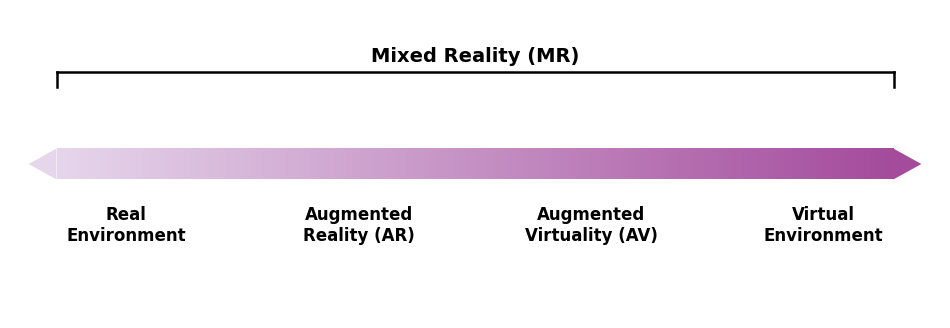

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# --- configuration ---
left_color_hex = "#e6d6ec"   # light purple on the left
right_color_hex = "#a44b9c"  # deep base on the right (as requested)

# convert hex to normalized RGB
def hex_to_rgb(hex_str):
    hex_str = hex_str.lstrip("#")
    return np.array([int(hex_str[i:i+2], 16) for i in (0, 2, 4)])/255.0

left_color = hex_to_rgb(left_color_hex)
right_color = hex_to_rgb(right_color_hex)

# --- create gradient ---
width = 1000
height = 40  # thicker so the arrow body looks smooth

# linear interpolation between the two colors
gradient = np.linspace(0, 1, width).reshape(1, -1, 1)
colors = left_color + (right_color - left_color) * gradient  # shape (1, width, 3)
gradient_img = np.repeat(colors, height, axis=0)  # shape (height, width, 3)

# --- plot ---
fig, ax = plt.subplots(figsize=(12, 4))

# main arrow body (gradient rectangle)
body_x0, body_x1, body_y0, body_y1 = 0.05, 0.95, 0.45, 0.55
ax.imshow(gradient_img,
          extent=[body_x0, body_x1, body_y0, body_y1],
          aspect='auto')

# arrow heads (slightly larger and matching gradient ends)
left_tri = Polygon([[body_x0, body_y0], [body_x0, body_y1], [body_x0 - 0.03, (body_y0 + body_y1)/2]],
                   facecolor=left_color, edgecolor='none')
right_tri = Polygon([[body_x1, body_y0], [body_x1, body_y1], [body_x1 + 0.03, (body_y0 + body_y1)/2]],
                    facecolor=right_color, edgecolor='none')
ax.add_patch(left_tri)
ax.add_patch(right_tri)

# bracket for "Mixed Reality (MR)" spanning full arrow width
bracket_x_start, bracket_x_end = body_x0, body_x1
bracket_y, bracket_drop = 0.80, 0.05
ax.plot([bracket_x_start, bracket_x_start],
        [bracket_y, bracket_y - bracket_drop], linewidth=1.8, color='black')
ax.plot([bracket_x_start, bracket_x_end],
        [bracket_y, bracket_y], linewidth=1.8, color='black')
ax.plot([bracket_x_end, bracket_x_end],
        [bracket_y, bracket_y - bracket_drop], linewidth=1.8, color='black')

# labels
ax.text(0.125, 0.30, "Real\nEnvironment", ha='center', va='center',
        fontsize=12, fontweight='bold')
ax.text(0.375, 0.30, "Augmented\nReality (AR)", ha='center', va='center',
        fontsize=12, fontweight='bold')

ax.text(0.625, 0.30, "Augmented\nVirtuality (AV)", ha='center', va='center',
        fontsize=12, fontweight='bold')
ax.text(0.875, 0.30, "Virtual\nEnvironment", ha='center', va='center',
        fontsize=12, fontweight='bold')

ax.text((bracket_x_start + bracket_x_end) / 2, bracket_y + 0.05,
        "Mixed Reality (MR)", ha='center', va='center',
        fontsize=14, fontweight='bold')

# tidy up
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')



# Save the diagram to file
plt.savefig("../assets/02/xr-cont.pdf", dpi=150, bbox_inches='tight', transparent=True)
plt.show()



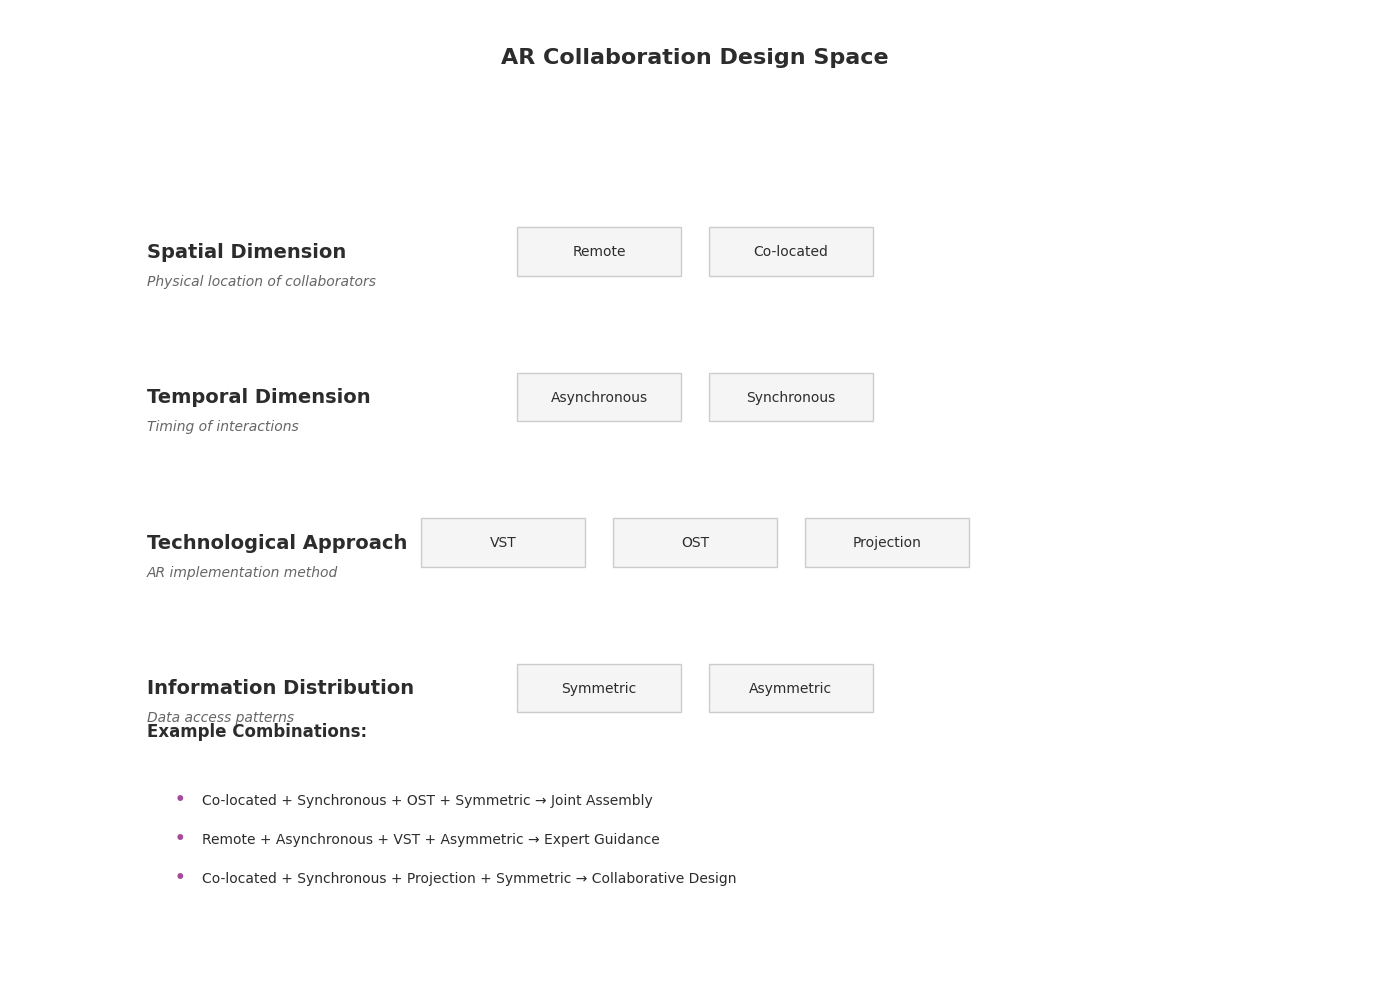

In [ ]:
# AR Collaboration Design Space - 2x2 Matrix Layout
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Improved color scheme - neutral with purple accents
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"

fig, ax = plt.subplots(figsize=(12, 10))

# Create 2x2 matrix layout
matrix_size = 0.35
center_x, center_y = 0.5, 0.5
spacing = 0.05

# Define quadrants
quadrants = [
    # (x, y, spatial, temporal, color_intensity)
    (center_x - matrix_size/2 - spacing/2, center_y + matrix_size/2 + spacing/2, 'Remote', 'Synchronous', 0.3),
    (center_x + matrix_size/2 + spacing/2, center_y + matrix_size/2 + spacing/2, 'Co-located', 'Synchronous', 0.7),
    (center_x - matrix_size/2 - spacing/2, center_y - matrix_size/2 - spacing/2, 'Remote', 'Asynchronous', 0.1),
    (center_x + matrix_size/2 + spacing/2, center_y - matrix_size/2 - spacing/2, 'Co-located', 'Asynchronous', 0.5),
]

# Draw quadrants
for x, y, spatial, temporal, intensity in quadrants:
    # Quadrant box
    quad_color = [accent_purple[1:3], accent_purple[3:5], accent_purple[5:7]]
    quad_color = [int(c, 16)/255 for c in quad_color]
    quad_rect = patches.Rectangle((x - matrix_size/2, y - matrix_size/2), matrix_size, matrix_size,
                                 facecolor=(*quad_color, 0.1 + intensity * 0.15),
                                 edgecolor=accent_purple, linewidth=2)
    ax.add_patch(quad_rect)
    
    # Main labels
    ax.text(x, y + 0.08, f'{spatial}', ha='center', va='center', 
            fontsize=13, fontweight='bold', color=dark_gray)
    ax.text(x, y + 0.05, f'{temporal}', ha='center', va='center', 
            fontsize=13, fontweight='bold', color=dark_gray)
    
    # Technology indicators
    tech_y = y - 0.02
    technologies = ['VST', 'OST', 'Proj']
    for i, tech in enumerate(technologies):
        tech_x = x - 0.06 + i * 0.06
        tech_circle = patches.Circle((tech_x, tech_y), 0.015, 
                                   facecolor=light_gray, edgecolor=border_gray, linewidth=1)
        ax.add_patch(tech_circle)
        ax.text(tech_x, tech_y, tech, ha='center', va='center', 
                fontsize=8, color=dark_gray)
    
    # Information distribution
    info_y = y - 0.08
    ax.text(x - 0.04, info_y, 'Sym', ha='center', va='center', 
            fontsize=9, color=medium_gray, 
            bbox=dict(boxstyle="round,pad=0.2", facecolor=light_gray, edgecolor=border_gray))
    ax.text(x + 0.04, info_y, 'Asym', ha='center', va='center', 
            fontsize=9, color=medium_gray,
            bbox=dict(boxstyle="round,pad=0.2", facecolor=light_gray, edgecolor=border_gray))
    
    # Use case examples
    examples = {
        ('Remote', 'Synchronous'): 'Live Expert\nGuidance',
        ('Co-located', 'Synchronous'): 'Joint Assembly\nTasks',
        ('Remote', 'Asynchronous'): 'Training\nMaterials',
        ('Co-located', 'Asynchronous'): 'Shift\nHandovers'
    }
    
    example_text = examples.get((spatial, temporal), '')
    ax.text(x, y - 0.12, example_text, ha='center', va='center', 
            fontsize=10, color=accent_purple, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=accent_purple, alpha=0.9))

# Axis labels
ax.text(0.5, 0.95, 'AR Collaboration Design Space', 
        fontsize=16, fontweight='bold', ha='center', va='center', color=dark_gray)

# Spatial axis
ax.annotate('', xy=(0.85, center_y), xytext=(0.15, center_y),
            arrowprops=dict(arrowstyle='<->', color=dark_gray, lw=2))
ax.text(0.15, center_y - 0.05, 'Remote', ha='center', va='center', 
        fontsize=12, fontweight='bold', color=dark_gray)
ax.text(0.85, center_y - 0.05, 'Co-located', ha='center', va='center', 
        fontsize=12, fontweight='bold', color=dark_gray)
ax.text(0.5, center_y - 0.08, 'Spatial Dimension', ha='center', va='center', 
        fontsize=11, style='italic', color=medium_gray)

# Temporal axis
ax.annotate('', xy=(center_x, 0.85), xytext=(center_x, 0.15),
            arrowprops=dict(arrowstyle='<->', color=dark_gray, lw=2))
ax.text(center_x - 0.08, 0.85, 'Synchronous', ha='center', va='center', 
        fontsize=12, fontweight='bold', color=dark_gray, rotation=90)
ax.text(center_x - 0.08, 0.15, 'Asynchronous', ha='center', va='center', 
        fontsize=12, fontweight='bold', color=dark_gray, rotation=90)
ax.text(center_x - 0.12, 0.5, 'Temporal Dimension', ha='center', va='center', 
        fontsize=11, style='italic', color=medium_gray, rotation=90)

# Legend
legend_x, legend_y = 0.02, 0.02
ax.text(legend_x, legend_y + 0.08, 'Technology:', fontsize=10, fontweight='bold', color=dark_gray)
ax.text(legend_x, legend_y + 0.05, 'VST = Video See-Through', fontsize=9, color=medium_gray)
ax.text(legend_x, legend_y + 0.03, 'OST = Optical See-Through', fontsize=9, color=medium_gray)
ax.text(legend_x, legend_y + 0.01, 'Proj = Projection-Based', fontsize=9, color=medium_gray)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.tight_layout()
plt.savefig("../assets/02/ar-collaboration-dimensions.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
# Shape Screenshots Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the shapes and their corresponding image files
shapes_data = [
    ("Small Cube", "cube.png"),
    ("T-shape", "t-shape.png"),
    ("L-shape", "l-shape.png"),
    ("Plank", "plank.png"),
    ("Big Cube", "big-cube.png"),
    ("Big T-shape", "big-t-shape.png"),
    ("Big L-shape", "big-l-shape.png")
]

# Path to the shapes directory
shapes_path = "../user-study-analysis/meta/shapes/"

# Create figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('User Study Shapes - Screenshots', fontsize=16, fontweight='bold', y=0.95)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Display each shape
for i, (shape_name, filename) in enumerate(shapes_data):
    if i < len(axes_flat):
        ax = axes_flat[i]
        
        # Load and display image
        img_path = os.path.join(shapes_path, filename)
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(shape_name, fontsize=12, fontweight='bold', pad=10)
        else:
            ax.text(0.5, 0.5, f'Image not found:\n{filename}', 
                   ha='center', va='center', fontsize=10, color='red')
            ax.set_title(shape_name, fontsize=12, fontweight='bold', pad=10)
        
        ax.axis('off')

# Hide remaining empty subplots
for i in range(len(shapes_data), len(axes_flat)):
    axes_flat[i].axis('off')

plt.tight_layout()
plt.show()

# Also create a more compact 2x4 layout alternative
fig2, axes2 = plt.subplots(2, 4, figsize=(16, 8))
fig2.suptitle('User Study Shapes - Screenshots (Compact Layout)', fontsize=16, fontweight='bold', y=0.95)

# Flatten axes for easier iteration
axes2_flat = axes2.flatten()

# Display each shape in compact layout
for i, (shape_name, filename) in enumerate(shapes_data):
    if i < len(axes2_flat):
        ax = axes2_flat[i]
        
        # Load and display image
        img_path = os.path.join(shapes_path, filename)
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(shape_name, fontsize=11, fontweight='bold', pad=8)
        else:
            ax.text(0.5, 0.5, f'Image not found:\n{filename}', 
                   ha='center', va='center', fontsize=9, color='red')
            ax.set_title(shape_name, fontsize=11, fontweight='bold', pad=8)
        
        ax.axis('off')

# Hide the last empty subplot
axes2_flat[7].axis('off')

plt.tight_layout()
plt.show()


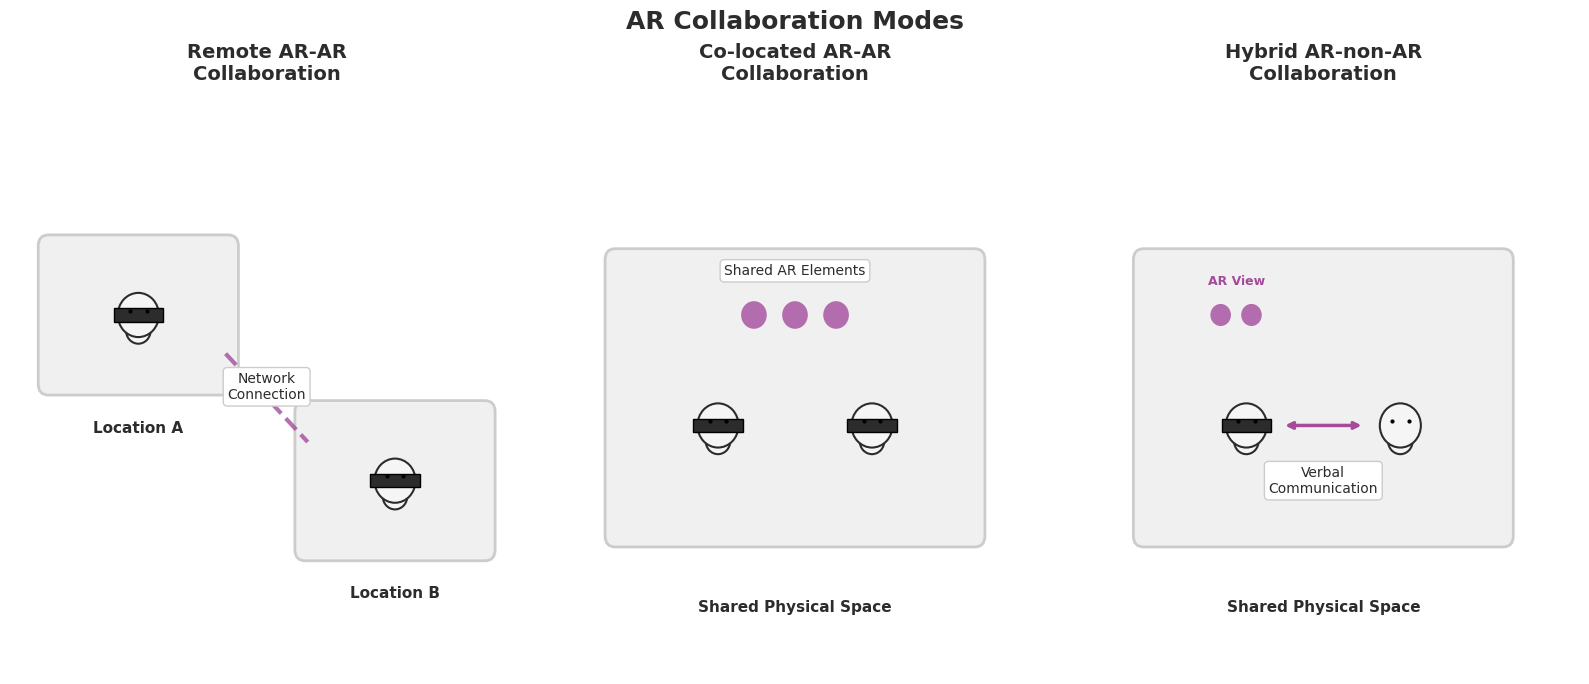

In [5]:
# AR Collaboration Modes - Fixed Layout with Better Spacing
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle
import numpy as np

# Color scheme - neutral with purple accents
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"
workspace_color = "#f0f0f0"

fig, axes = plt.subplots(1, 3, figsize=(16, 7))
fig.suptitle('AR Collaboration Modes', fontsize=18, fontweight='bold', color=dark_gray, y=0.97)  # Moved higher

# Helper function to draw a clean person
def draw_person(ax, x, y, has_hmd=True, size=0.04):
    # Body
    body = Circle((x, y-size*0.7), size*0.6, facecolor=light_gray, edgecolor=dark_gray, linewidth=1.5)
    ax.add_patch(body)
    
    # Head
    head = Circle((x, y), size, facecolor=light_gray, edgecolor=dark_gray, linewidth=1.5)
    ax.add_patch(head)
    
    # Eyes
    ax.plot(x-size*0.4, y+size*0.2, 'ko', markersize=2)
    ax.plot(x+size*0.4, y+size*0.2, 'ko', markersize=2)
    
    # HMD if applicable
    if has_hmd:
        hmd = Rectangle((x-size*1.2, y-size*0.3), size*2.4, size*0.6, 
                       facecolor=dark_gray, edgecolor='black', linewidth=1)
        ax.add_patch(hmd)

# Helper function to draw workspace
def draw_workspace(ax, x, y, width, height, label, label_y_offset=0):
    workspace = FancyBboxPatch((x-width/2, y-height/2), width, height,
                              boxstyle="round,pad=0.02", 
                              facecolor=workspace_color, edgecolor=border_gray, linewidth=2)
    ax.add_patch(workspace)
    ax.text(x, y-height/2-0.08+label_y_offset, label, ha='center', va='center', 
            fontsize=11, fontweight='bold', color=dark_gray)

# 1. Remote AR-AR Collaboration
ax1 = axes[0]
ax1.set_title('Remote AR-AR\nCollaboration', fontsize=14, fontweight='bold', color=dark_gray, pad=30)

# Draw two separate workspaces with better positioning
workspace_width, workspace_height = 0.35, 0.25
draw_workspace(ax1, 0.25, 0.65, workspace_width, workspace_height, 'Location A')
draw_workspace(ax1, 0.75, 0.35, workspace_width, workspace_height, 'Location B')

# Draw people with HMDs - properly positioned inside workspaces
draw_person(ax1, 0.25, 0.65, has_hmd=True)
draw_person(ax1, 0.75, 0.35, has_hmd=True)

# Draw connection with better positioning
ax1.plot([0.42, 0.58], [0.58, 0.42], color=accent_purple, linewidth=3, linestyle='--', alpha=0.8)
ax1.text(0.5, 0.52, 'Network\nConnection', ha='center', va='center', fontsize=10, 
         color=dark_gray, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=border_gray))

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# 2. Co-located AR-AR Collaboration
ax2 = axes[1]
ax2.set_title('Co-located AR-AR\nCollaboration', fontsize=14, fontweight='bold', color=dark_gray, pad=30)

# Draw shared workspace
draw_workspace(ax2, 0.5, 0.5, 0.7, 0.5, 'Shared Physical Space', label_y_offset=-0.05)

# Draw people with HMDs - properly positioned
draw_person(ax2, 0.35, 0.45, has_hmd=True)
draw_person(ax2, 0.65, 0.45, has_hmd=True)

# Draw shared AR elements - positioned logically above the workspace
shared_elements_y = 0.65
for i in range(3):
    x = 0.42 + i * 0.08
    shared_element = Circle((x, shared_elements_y), 0.025, facecolor=accent_purple, alpha=0.8)
    ax2.add_patch(shared_element)

# Better positioned label for shared elements
ax2.text(0.5, shared_elements_y + 0.08, 'Shared AR Elements', ha='center', va='center', fontsize=10,
         color=dark_gray, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=border_gray))

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

# 3. Hybrid AR-non-AR Collaboration
ax3 = axes[2]
ax3.set_title('Hybrid AR-non-AR\nCollaboration', fontsize=14, fontweight='bold', color=dark_gray, pad=30)

# Draw shared workspace
draw_workspace(ax3, 0.5, 0.5, 0.7, 0.5, 'Shared Physical Space', label_y_offset=-0.05)

# Draw people - one with HMD, one without
draw_person(ax3, 0.35, 0.45, has_hmd=True)
draw_person(ax3, 0.65, 0.45, has_hmd=False)

# Draw AR elements visible only to HMD user - positioned above left person
ar_elements_y = 0.65
for i in range(2):
    x = 0.30 + i * 0.06
    ar_element = Circle((x, ar_elements_y), 0.02, facecolor=accent_purple, alpha=0.8)
    ax3.add_patch(ar_element)

# Label for AR elements
ax3.text(0.33, ar_elements_y + 0.06, 'AR View', ha='center', va='center', fontsize=9,
         color=accent_purple, fontweight='bold')

# Draw communication arrow - properly positioned between people
ax3.annotate('', xy=(0.58, 0.45), xytext=(0.42, 0.45),
            arrowprops=dict(arrowstyle='<->', color=accent_purple, lw=2.5))

# Better positioned communication label
ax3.text(0.5, 0.35, 'Verbal\nCommunication', ha='center', va='center', fontsize=10,
         color=dark_gray, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=border_gray))

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')

plt.tight_layout()
plt.savefig("../assets/02/ar-collaboration-modes.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


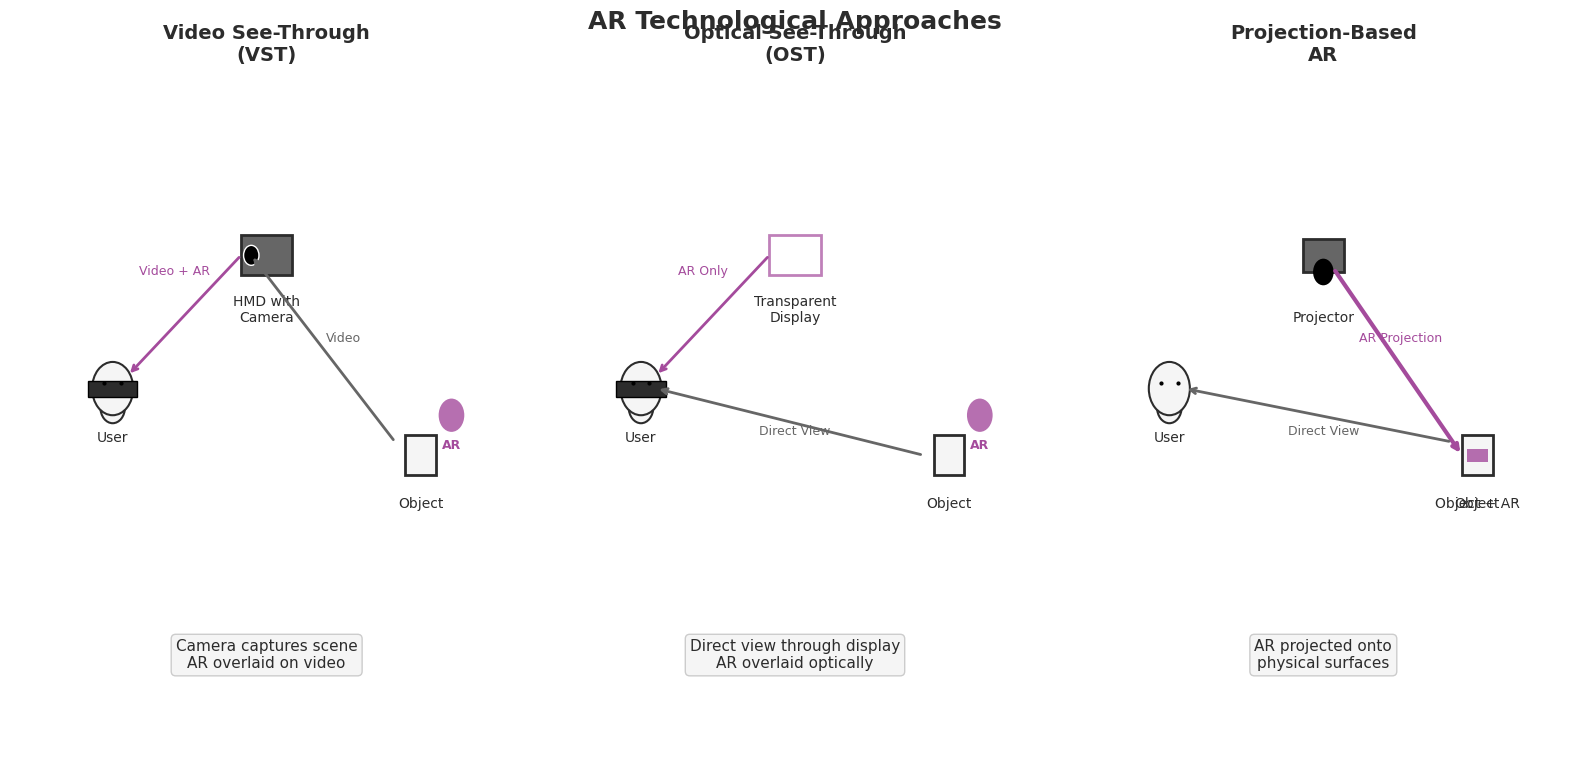

In [ ]:
# AR Technological Approaches - Consistent with Collaboration Modes
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle
import numpy as np

# Color scheme - neutral with purple accents
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle('AR Technological Approaches', fontsize=18, fontweight='bold', color=dark_gray, y=0.95)

# Define consistent positions for all three diagrams
user_x, user_y = 0.2, 0.55
device_x, device_y = 0.5, 0.75
object_x, object_y = 0.8, 0.45

def draw_person_with_hmd(ax, x, y, has_hmd=True, size=0.04):
    """Draw a person consistent with AR Collaboration Modes"""
    # Body
    body = Circle((x, y-size*0.7), size*0.6, facecolor=light_gray, edgecolor=dark_gray, linewidth=1.5)
    ax.add_patch(body)
    
    # Head
    head = Circle((x, y), size, facecolor=light_gray, edgecolor=dark_gray, linewidth=1.5)
    ax.add_patch(head)
    
    # Eyes
    ax.plot(x-size*0.4, y+size*0.2, 'ko', markersize=2)
    ax.plot(x+size*0.4, y+size*0.2, 'ko', markersize=2)
    
    # HMD if applicable
    if has_hmd:
        hmd = Rectangle((x-size*1.2, y-size*0.3), size*2.4, size*0.6, 
                       facecolor=dark_gray, edgecolor='black', linewidth=1)
        ax.add_patch(hmd)
    
    # Label
    ax.text(x, y-size*2, 'User', ha='center', fontsize=10, color=dark_gray)

def draw_simple_object(ax, x, y):
    """Draw a simple object"""
    obj = Rectangle((x-0.03, y-0.03), 0.06, 0.06, facecolor=light_gray, edgecolor=dark_gray, linewidth=2)
    ax.add_patch(obj)
    ax.text(x, y-0.08, 'Object', ha='center', fontsize=10, color=dark_gray)

def draw_ar_content(ax, x, y, label='AR'):
    """Draw AR content indicator"""
    ar = Circle((x, y), 0.025, facecolor=accent_purple, alpha=0.8)
    ax.add_patch(ar)
    ax.text(x, y-0.05, label, ha='center', fontsize=9, color=accent_purple, fontweight='bold')

# 1. Video See-Through (VST)
ax1 = axes[0]
ax1.set_title('Video See-Through\n(VST)', fontsize=14, fontweight='bold', color=dark_gray, pad=20)

# Draw components
draw_person_with_hmd(ax1, user_x, user_y, has_hmd=True)
draw_simple_object(ax1, object_x, object_y)
draw_ar_content(ax1, object_x + 0.06, object_y + 0.06, 'AR')

# Device (camera + display)
device = Rectangle((device_x-0.05, device_y-0.03), 0.1, 0.06, 
                  facecolor=medium_gray, edgecolor=dark_gray, linewidth=2)
ax1.add_patch(device)
# Camera lens
camera = Circle((device_x-0.03, device_y), 0.015, facecolor='black', edgecolor='white', linewidth=1)
ax1.add_patch(camera)
ax1.text(device_x, device_y-0.1, 'HMD with\nCamera', ha='center', fontsize=10, color=dark_gray)

# Information flow arrows with better spacing
ax1.annotate('', xy=(device_x-0.03, device_y), xytext=(object_x-0.05, object_y+0.02),
            arrowprops=dict(arrowstyle='->', color=medium_gray, lw=2))
ax1.text(0.65, 0.62, 'Video', ha='center', fontsize=9, color=medium_gray)

ax1.annotate('', xy=(user_x+0.03, user_y+0.02), xytext=(device_x-0.05, device_y),
            arrowprops=dict(arrowstyle='->', color=accent_purple, lw=2))
ax1.text(0.32, 0.72, 'Video + AR', ha='center', fontsize=9, color=accent_purple)

# Key concept with better positioning
ax1.text(0.5, 0.15, 'Camera captures scene\nAR overlaid on video', 
         ha='center', va='center', fontsize=11, color=dark_gray,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=light_gray, edgecolor=border_gray))

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# 2. Optical See-Through (OST)
ax2 = axes[1]
ax2.set_title('Optical See-Through\n(OST)', fontsize=14, fontweight='bold', color=dark_gray, pad=20)

# Draw components
draw_person_with_hmd(ax2, user_x, user_y, has_hmd=True)
draw_simple_object(ax2, object_x, object_y)
draw_ar_content(ax2, object_x + 0.06, object_y + 0.06, 'AR')

# Device (transparent display)
device = Rectangle((device_x-0.05, device_y-0.03), 0.1, 0.06, 
                  facecolor='white', edgecolor=accent_purple, linewidth=2, alpha=0.7)
ax2.add_patch(device)
ax2.text(device_x, device_y-0.1, 'Transparent\nDisplay', ha='center', fontsize=10, color=dark_gray)

# Information flow arrows
ax2.annotate('', xy=(user_x+0.03, user_y), xytext=(object_x-0.05, object_y),
            arrowprops=dict(arrowstyle='->', color=medium_gray, lw=2))
ax2.text(0.5, 0.48, 'Direct View', ha='center', fontsize=9, color=medium_gray)

ax2.annotate('', xy=(user_x+0.03, user_y+0.02), xytext=(device_x-0.05, device_y),
            arrowprops=dict(arrowstyle='->', color=accent_purple, lw=2))
ax2.text(0.32, 0.72, 'AR Only', ha='center', fontsize=9, color=accent_purple)

# Key concept
ax2.text(0.5, 0.15, 'Direct view through display\nAR overlaid optically', 
         ha='center', va='center', fontsize=11, color=dark_gray,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=light_gray, edgecolor=border_gray))

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

# 3. Projection-Based
ax3 = axes[2]
ax3.set_title('Projection-Based\nAR', fontsize=14, fontweight='bold', color=dark_gray, pad=20)

# Draw components - no HMD for projection-based
draw_person_with_hmd(ax3, user_x, user_y, has_hmd=False)
draw_simple_object(ax3, object_x, object_y)

# Projector
projector = Rectangle((device_x-0.04, device_y-0.025), 0.08, 0.05, 
                     facecolor=medium_gray, edgecolor=dark_gray, linewidth=2)
ax3.add_patch(projector)
# Projector lens
lens = Circle((device_x, device_y-0.025), 0.02, facecolor='black')
ax3.add_patch(lens)
ax3.text(device_x, device_y-0.1, 'Projector', ha='center', fontsize=10, color=dark_gray)

# AR content projected onto object
projected_ar = Rectangle((object_x-0.02, object_y-0.01), 0.04, 0.02, 
                        facecolor=accent_purple, alpha=0.8)
ax3.add_patch(projected_ar)
ax3.text(object_x, object_y-0.08, 'Object + AR', ha='center', fontsize=10, color=dark_gray)

# Projection arrow
ax3.annotate('', xy=(object_x-0.03, object_y), xytext=(device_x+0.02, device_y-0.02),
            arrowprops=dict(arrowstyle='->', color=accent_purple, lw=3))
ax3.text(0.65, 0.62, 'AR Projection', ha='center', fontsize=9, color=accent_purple)

# User view arrow
ax3.annotate('', xy=(user_x+0.03, user_y), xytext=(object_x-0.05, object_y+0.02),
            arrowprops=dict(arrowstyle='->', color=medium_gray, lw=2))
ax3.text(0.5, 0.48, 'Direct View', ha='center', fontsize=9, color=medium_gray)

# Key concept
ax3.text(0.5, 0.15, 'AR projected onto\nphysical surfaces', 
         ha='center', va='center', fontsize=11, color=dark_gray,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=light_gray, edgecolor=border_gray))

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')

plt.tight_layout()
plt.savefig("../assets/02/ar-technological-approaches.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


Found 8 participant folders
Loaded 32 constructions


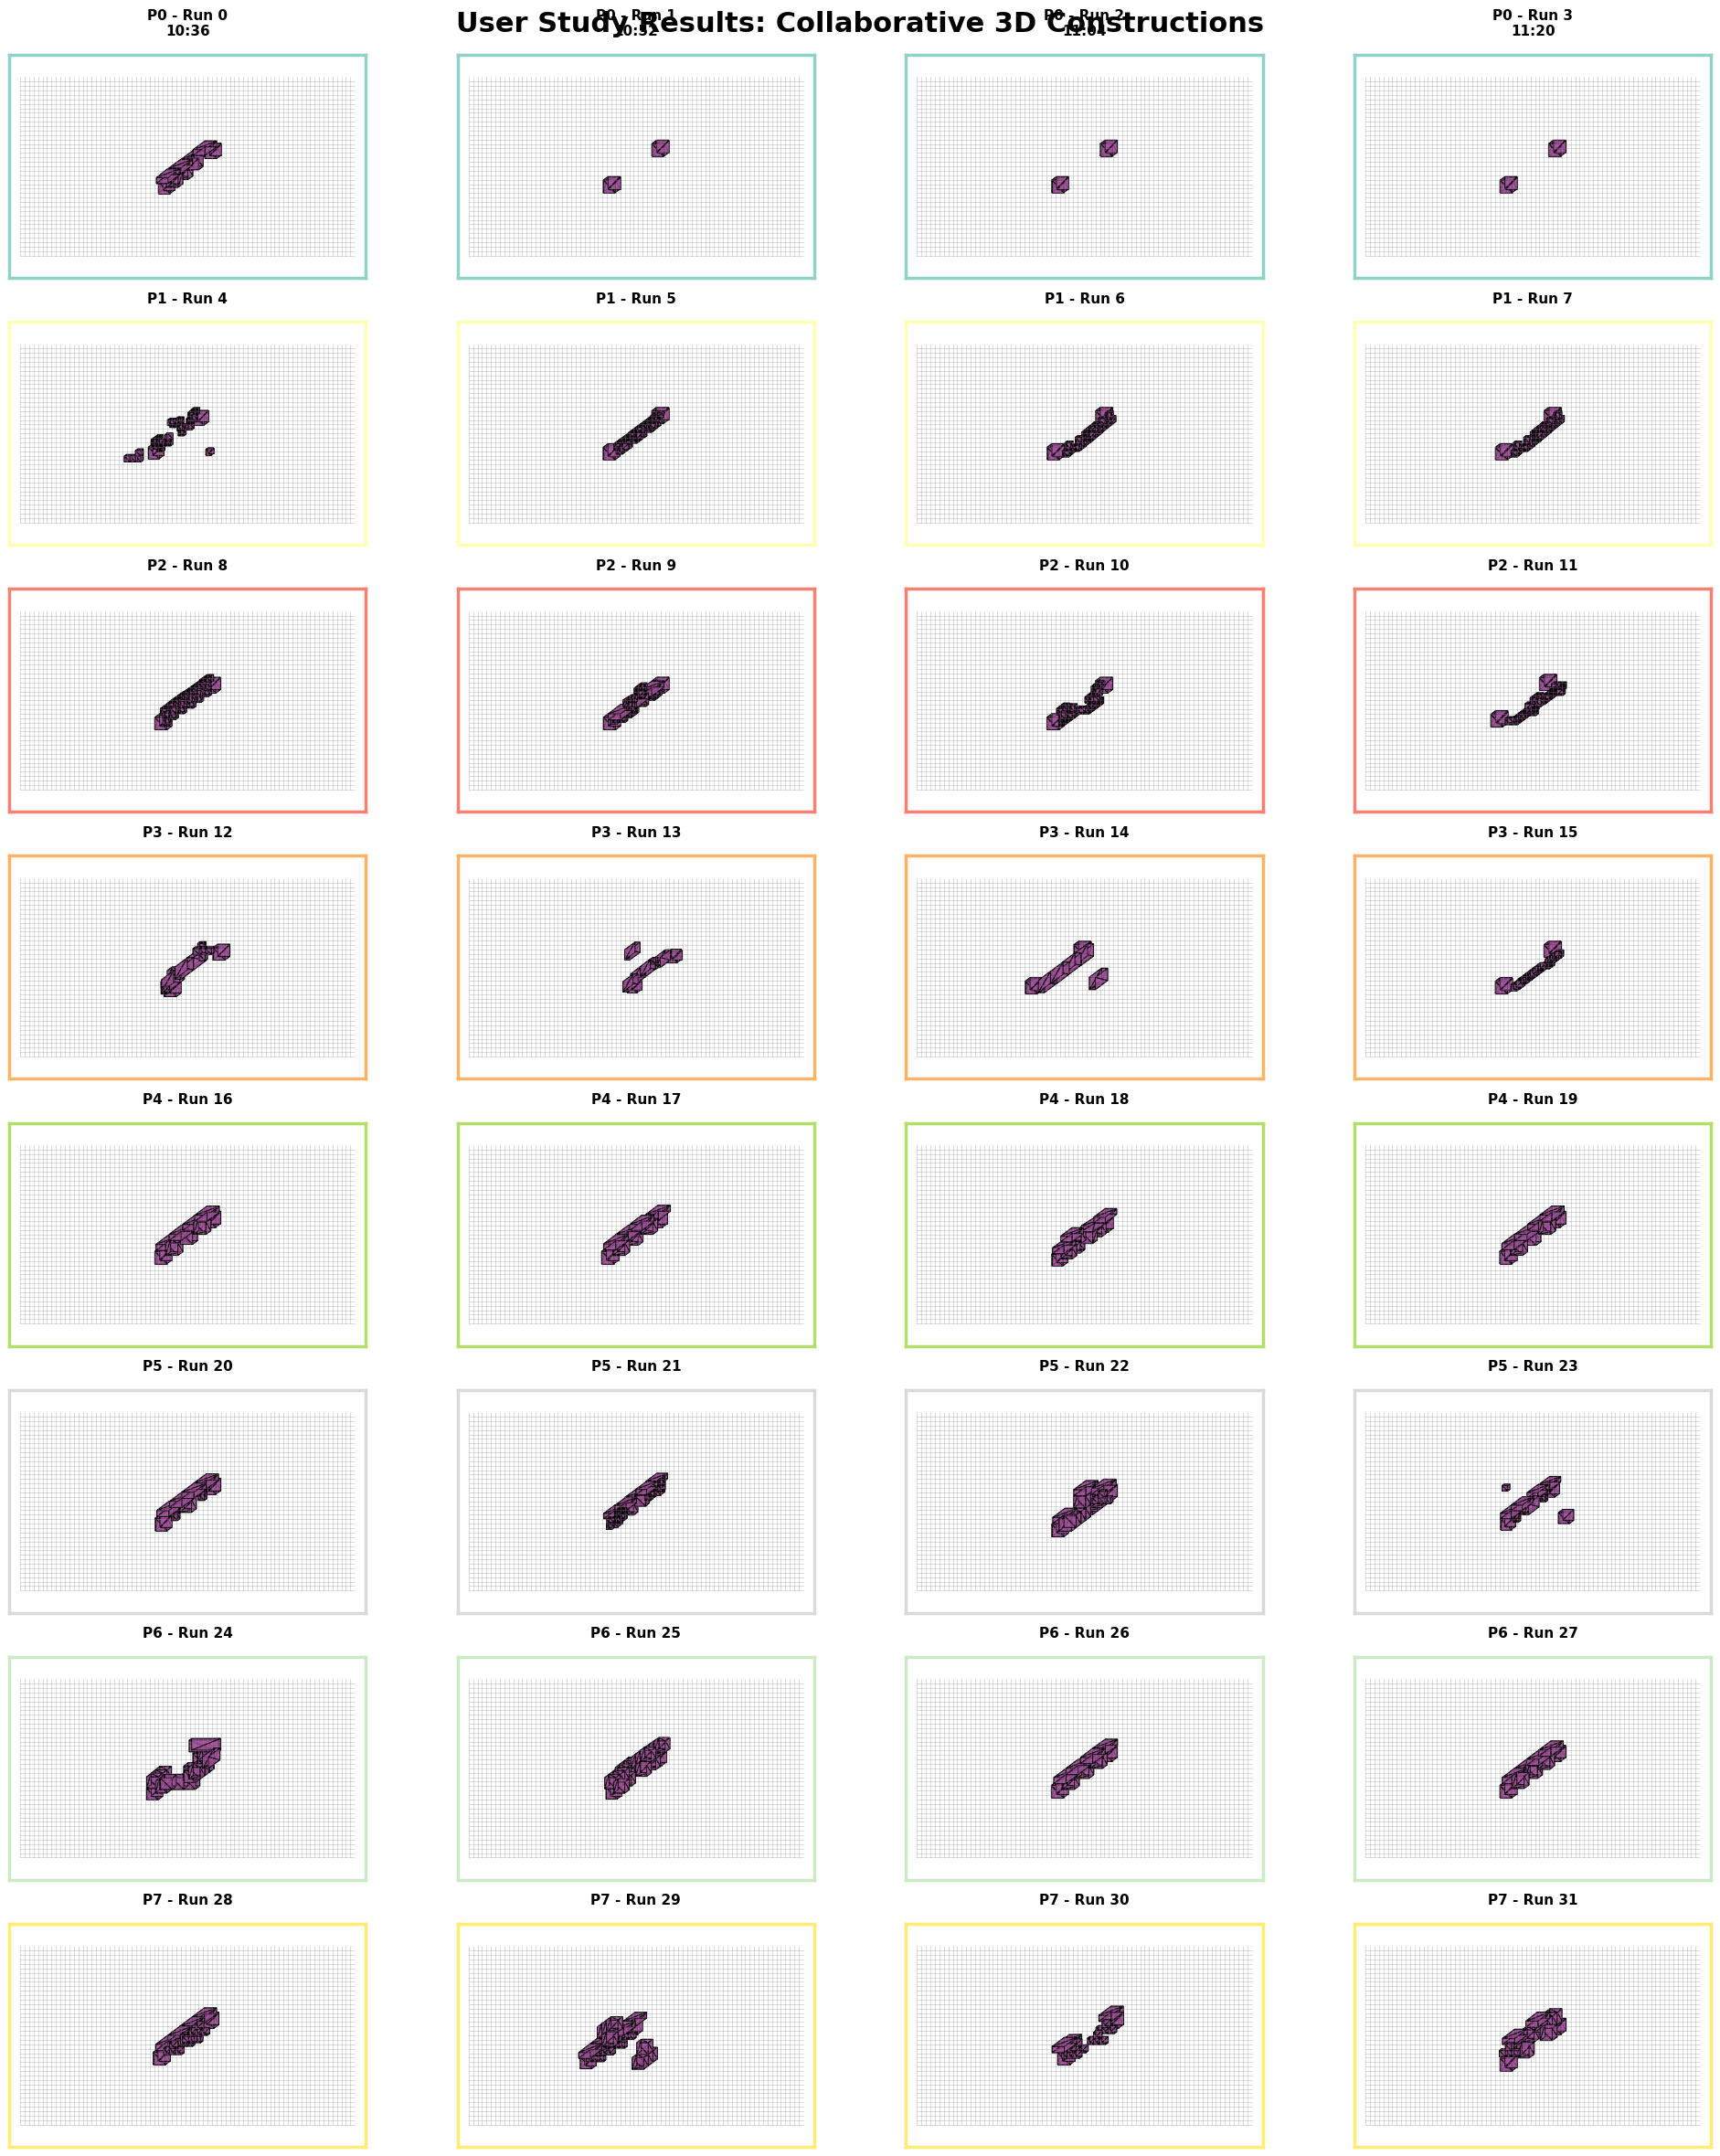

Successfully created improved visualization with 32 constructions
Saved to: ../assets/05/user-study-constructions.pdf


In [25]:
# User Study Results: All 32 Collaborative Constructions - Improved Layout
import os
import glob
import json
from pathlib import Path

def parse_obj_file(obj_path):
    """Parse an .obj file and extract basic geometric information"""
    vertices = []
    faces = []
    objects = []
    current_object = None
    
    try:
        with open(obj_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line.startswith('o '):  # Object definition
                    current_object = line[2:]
                    objects.append(current_object)
                elif line.startswith('v '):  # Vertex
                    coords = list(map(float, line.split()[1:4]))
                    vertices.append(coords)
                elif line.startswith('f '):  # Face
                    face_indices = []
                    for vertex_data in line.split()[1:]:
                        # Handle v/vt/vn format
                        vertex_index = int(vertex_data.split('/')[0]) - 1  # OBJ uses 1-based indexing
                        face_indices.append(vertex_index)
                    faces.append(face_indices)
    except Exception as e:
        print(f"Error parsing {obj_path}: {e}")
        return [], [], []
    
    return vertices, faces, objects

def get_bounding_box(vertices):
    """Calculate bounding box of vertices"""
    if not vertices:
        return (0, 0, 0), (0, 0, 0)
    
    x_coords = [v[0] for v in vertices]
    y_coords = [v[1] for v in vertices]
    z_coords = [v[2] for v in vertices]
    
    min_point = (min(x_coords), min(y_coords), min(z_coords))
    max_point = (max(x_coords), max(y_coords), max(z_coords))
    
    return min_point, max_point

def draw_3d_construction_improved(ax, vertices, faces, center_x, center_y, scale=1.0):
    """Draw an improved 3D representation of the construction with better scaling"""
    if not vertices or not faces:
        return
    
    # Calculate bounding box and normalize
    min_pt, max_pt = get_bounding_box(vertices)
    
    # Center the model
    center = [(min_pt[i] + max_pt[i]) / 2 for i in range(3)]
    normalized_vertices = [[v[i] - center[i] for i in range(3)] for v in vertices]
    
    # Better balanced scaling for visibility without overflow
    size = max([max_pt[i] - min_pt[i] for i in range(3)])
    if size > 0:
        # More reasonable scale - bigger than original but fits in boxes
        scale_factor = (scale * 0.6) / size  # 3x larger than original
        normalized_vertices = [[v[i] * scale_factor for i in range(3)] for v in normalized_vertices]
    
    # Balanced isometric projection optimized for wide structures
    unit_size = 0.5  # Moderate unit size that fits well
    depth_offset_x = 0.2  # Good depth effect without overflow
    depth_offset_y = 0.15
    
    # Draw faces as simple polygons with improved rendering
    for face in faces:
        if len(face) >= 3:  # At least a triangle
            # Take first 3 vertices for triangular faces, or first 4 for quads
            face_vertices = face[:4] if len(face) >= 4 else face[:3]
            
            # Project vertices to 2D using isometric projection
            projected_points = []
            for vertex_idx in face_vertices:
                if 0 <= vertex_idx < len(normalized_vertices):
                    v = normalized_vertices[vertex_idx]
                    x = center_x + v[0] * unit_size + v[2] * depth_offset_x
                    y = center_y + v[1] * unit_size + v[2] * depth_offset_y
                    projected_points.append([x, y])
            
            if len(projected_points) >= 3:
                # Draw the face with improved styling
                face_polygon = plt.Polygon(projected_points, 
                                         facecolor=accent_purple, 
                                         alpha=0.8,  # Slightly more opaque
                                         edgecolor='black', 
                                         linewidth=0.8)  # Thicker edges for clarity
                ax.add_patch(face_polygon)

def draw_grid_texture_improved(ax, x, y, width, height):
    """Draw an improved grid texture pattern optimized for rectangular layouts"""
    grid_spacing = 0.02  # Slightly larger grid for better visibility
    
    # Vertical lines
    x_pos = x
    while x_pos <= x + width:
        ax.plot([x_pos, x_pos], [y, y + height], color='gray', linewidth=0.4, alpha=0.5)
        x_pos += grid_spacing
    
    # Horizontal lines
    y_pos = y
    while y_pos <= y + height:
        ax.plot([x, x + width], [y_pos, y_pos], color='gray', linewidth=0.4, alpha=0.5)
        y_pos += grid_spacing

# Collect all user study data
study_data = []
base_path = Path('../user-study-analysis')

# Get all participant folders
participant_folders = [d for d in base_path.iterdir() if d.is_dir() and '_' in d.name]
participant_folders.sort()

print(f"Found {len(participant_folders)} participant folders")

for participant_folder in participant_folders:
    participant_id = participant_folder.name.split('_')[0]
    
    # Look for runs.json to get metadata
    runs_json_path = participant_folder / 'runs.json'
    runs_metadata = {}
    if runs_json_path.exists():
        try:
            with open(runs_json_path, 'r') as f:
                runs_data = json.load(f)
                for run in runs_data:
                    runs_metadata[run['run_id']] = run
        except:
            pass
    
    # Find all run folders
    run_folders = [d for d in participant_folder.iterdir() if d.is_dir() and d.name.split('-')[0].isdigit()]
    run_folders.sort(key=lambda x: int(x.name.split('-')[0]))
    
    for run_folder in run_folders:
        run_id = int(run_folder.name.split('-')[0])
        
        # Find .obj file
        obj_files = list(run_folder.glob('*.obj'))
        if obj_files:
            obj_path = obj_files[0]
            
            # Parse the .obj file
            vertices, faces, objects = parse_obj_file(obj_path)
            
            study_data.append({
                'participant_id': participant_id,
                'run_id': run_id,
                'obj_path': obj_path,
                'vertices': vertices,
                'faces': faces,
                'objects': objects,
                'metadata': runs_metadata.get(run_id, {})
            })

print(f"Loaded {len(study_data)} constructions")

# Create improved visualization with rectangular layout optimized for bridge structures
fig, axes = plt.subplots(8, 4, figsize=(20, 24))  # Wider figure for better bridge display
fig.suptitle('User Study Results: Collaborative 3D Constructions', fontsize=22, fontweight='bold')

# Colors for different participants
participant_colors = plt.cm.Set3(np.linspace(0, 1, 8))

for i, participant_folder in enumerate(participant_folders):
    participant_id = participant_folder.name.split('_')[0]
    
    # Get data for this participant
    participant_data = [d for d in study_data if d['participant_id'] == participant_id]
    participant_data.sort(key=lambda x: x['run_id'])
    
    for j in range(4):  # 4 runs per participant
        ax = axes[i, j]
        
        # Use rectangular aspect ratio optimized for bridge-like structures
        ax.set_xlim(0, 1.6)  # Wider than tall
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        
        # Draw background grid texture adapted for rectangular layout
        draw_grid_texture_improved(ax, 0.05, 0.1, 1.5, 0.8)
        
        if j < len(participant_data):
            construction = participant_data[j]
            
            # Center the construction in the wider layout
            draw_3d_construction_improved(ax, construction['vertices'], construction['faces'], 
                                        0.8, 0.5, scale=2.0)  # Balanced scale that fits well
            
            # Add title with timing info if available
            title = f"P{participant_id} - Run {construction['run_id']}"
            if construction['metadata']:
                start_time = construction['metadata'].get('start', '')
                if start_time:
                    # Extract time from ISO format
                    time_part = start_time.split('T')[1][:5] if 'T' in start_time else ''
                    if time_part:
                        title += f"\n{time_part}"
            
            ax.set_title(title, fontsize=11, fontweight='bold', pad=15)
        else:
            ax.set_title(f"P{participant_id} - Run {j+1}", fontsize=11, color='gray')
            ax.text(0.8, 0.5, 'No Data', ha='center', va='center', fontsize=14, color='gray')
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        
        # Color-code by participant
        for spine in ax.spines.values():
            spine.set_color(participant_colors[i])
            spine.set_linewidth(2.5)

plt.tight_layout()
plt.subplots_adjust(top=0.96)

# Save the improved figure
plt.savefig('../assets/05/user-study-constructions.pdf', 
            format='pdf', 
            bbox_inches='tight', 
            dpi=300, 
            facecolor='white')

plt.show()

print(f"Successfully created improved visualization with {len(study_data)} constructions")
print("Saved to: ../assets/05/user-study-constructions.pdf")


Found 8 participant folders
Loaded 32 constructions


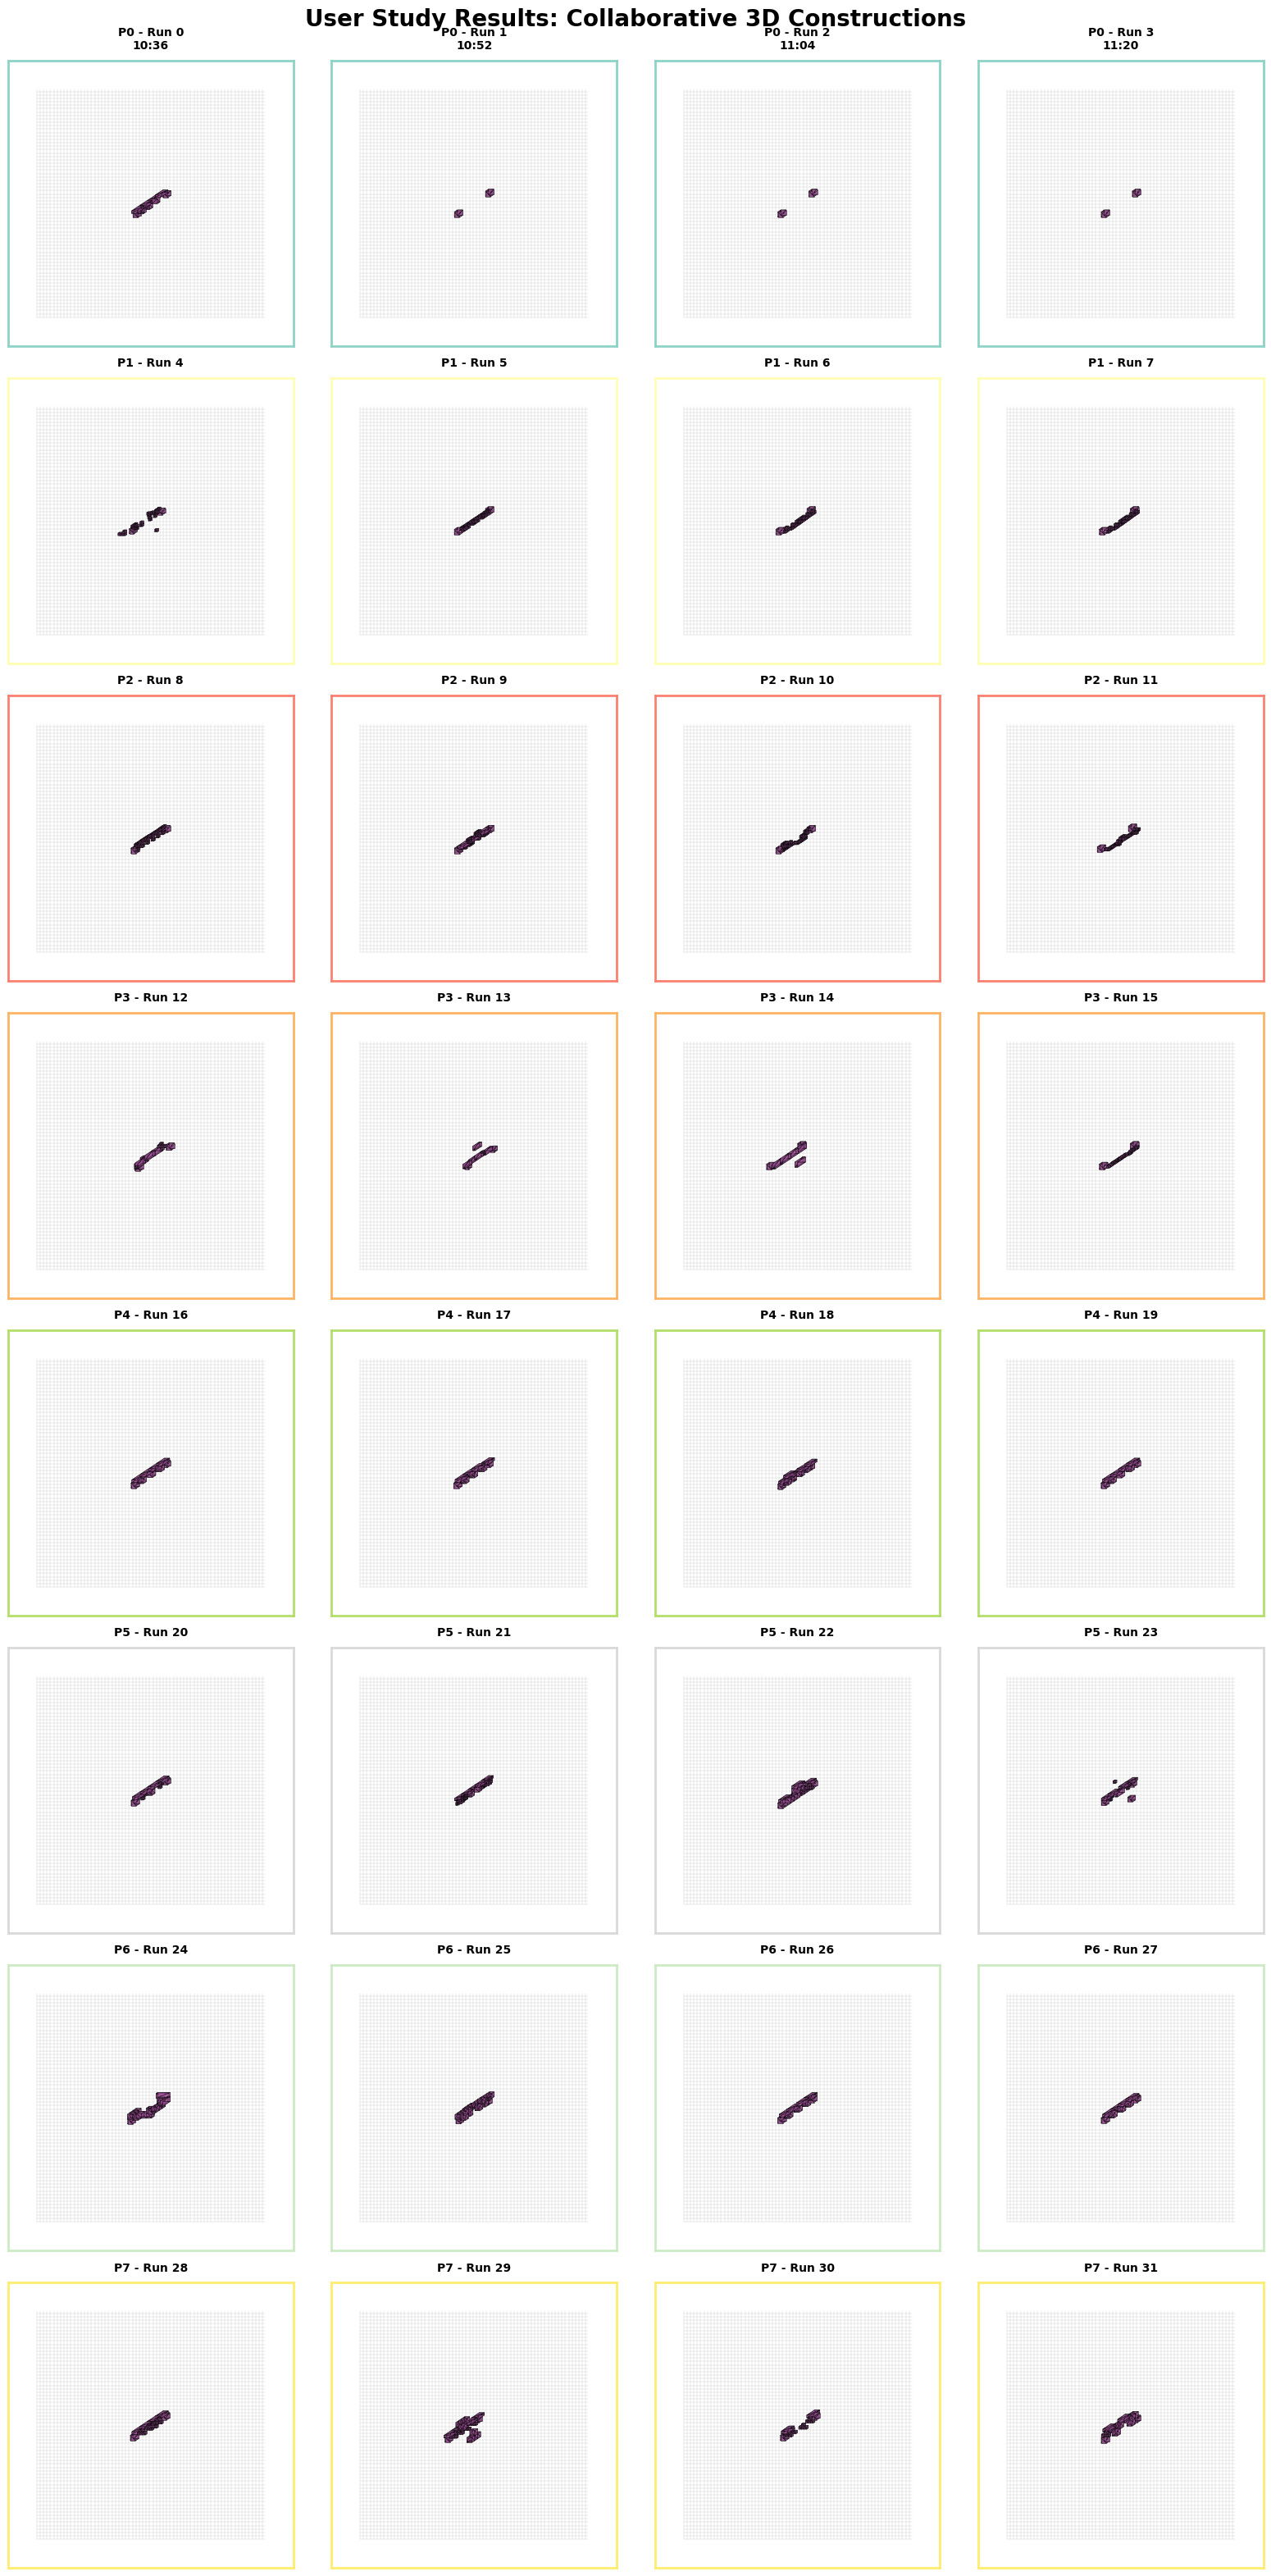

Successfully created visualization with 32 constructions
Saved to: ../assets/05/user-study-constructions.pdf


In [21]:
# User Study Results: All 32 Collaborative Constructions
import os
import glob
import json
from pathlib import Path

def parse_obj_file(obj_path):
    """Parse an .obj file and extract basic geometric information"""
    vertices = []
    faces = []
    objects = []
    current_object = None
    
    try:
        with open(obj_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line.startswith('o '):  # Object definition
                    current_object = line[2:]
                    objects.append(current_object)
                elif line.startswith('v '):  # Vertex
                    coords = list(map(float, line.split()[1:4]))
                    vertices.append(coords)
                elif line.startswith('f '):  # Face
                    face_indices = []
                    for vertex_data in line.split()[1:]:
                        # Handle v/vt/vn format
                        vertex_index = int(vertex_data.split('/')[0]) - 1  # OBJ uses 1-based indexing
                        face_indices.append(vertex_index)
                    faces.append(face_indices)
    except Exception as e:
        print(f"Error parsing {obj_path}: {e}")
        return [], [], []
    
    return vertices, faces, objects

def get_bounding_box(vertices):
    """Calculate bounding box of vertices"""
    if not vertices:
        return (0, 0, 0), (0, 0, 0)
    
    x_coords = [v[0] for v in vertices]
    y_coords = [v[1] for v in vertices]
    z_coords = [v[2] for v in vertices]
    
    min_point = (min(x_coords), min(y_coords), min(z_coords))
    max_point = (max(x_coords), max(y_coords), max(z_coords))
    
    return min_point, max_point

def draw_3d_construction_simple(ax, vertices, faces, center_x, center_y, scale=1.0):
    """Draw a simplified 3D representation of the construction"""
    if not vertices or not faces:
        return
    
    # Calculate bounding box and normalize
    min_pt, max_pt = get_bounding_box(vertices)
    
    # Center the model
    center = [(min_pt[i] + max_pt[i]) / 2 for i in range(3)]
    normalized_vertices = [[v[i] - center[i] for i in range(3)] for v in vertices]
    
    # Scale factor based on bounding box - make objects much larger
    size = max([max_pt[i] - min_pt[i] for i in range(3)])
    if size > 0:
        scale_factor = (scale * 0.4) / size  # Much larger base scale
        normalized_vertices = [[v[i] * scale_factor for i in range(3)] for v in normalized_vertices]
    
    # Apply isometric projection with larger unit size
    unit_size = 0.25  # Increased from 0.08
    depth_offset_x = 0.15
    depth_offset_y = 0.1
    
    # Draw faces as simple polygons
    for face in faces:
        if len(face) >= 3:  # At least a triangle
            # Take first 3 vertices for triangular faces, or first 4 for quads
            face_vertices = face[:4] if len(face) >= 4 else face[:3]
            
            # Project vertices to 2D using isometric projection
            projected_points = []
            for vertex_idx in face_vertices:
                if 0 <= vertex_idx < len(normalized_vertices):
                    v = normalized_vertices[vertex_idx]
                    x = center_x + v[0] * unit_size + v[2] * depth_offset_x
                    y = center_y + v[1] * unit_size + v[2] * depth_offset_y
                    projected_points.append([x, y])
            
            if len(projected_points) >= 3:
                # Draw the face
                face_polygon = plt.Polygon(projected_points, 
                                         facecolor=accent_purple, 
                                         alpha=0.7, 
                                         edgecolor='black', 
                                         linewidth=0.5)
                ax.add_patch(face_polygon)

def draw_grid_texture_simple(ax, x, y, width, height):
    """Draw a simple grid texture pattern"""
    grid_spacing = 0.012
    
    # Vertical lines
    x_pos = x
    while x_pos <= x + width:
        ax.plot([x_pos, x_pos], [y, y + height], color='gray', linewidth=0.3, alpha=0.4)
        x_pos += grid_spacing
    
    # Horizontal lines
    y_pos = y
    while y_pos <= y + height:
        ax.plot([x, x + width], [y_pos, y_pos], color='gray', linewidth=0.3, alpha=0.4)
        y_pos += grid_spacing

# Collect all user study data
study_data = []
base_path = Path('../user-study-analysis')

# Get all participant folders
participant_folders = [d for d in base_path.iterdir() if d.is_dir() and '_' in d.name]
participant_folders.sort()

print(f"Found {len(participant_folders)} participant folders")

for participant_folder in participant_folders:
    participant_id = participant_folder.name.split('_')[0]
    
    # Look for runs.json to get metadata
    runs_json_path = participant_folder / 'runs.json'
    runs_metadata = {}
    if runs_json_path.exists():
        try:
            with open(runs_json_path, 'r') as f:
                runs_data = json.load(f)
                for run in runs_data:
                    runs_metadata[run['run_id']] = run
        except:
            pass
    
    # Find all run folders
    run_folders = [d for d in participant_folder.iterdir() if d.is_dir() and d.name.split('-')[0].isdigit()]
    run_folders.sort(key=lambda x: int(x.name.split('-')[0]))
    
    for run_folder in run_folders:
        run_id = int(run_folder.name.split('-')[0])
        
        # Find .obj file
        obj_files = list(run_folder.glob('*.obj'))
        if obj_files:
            obj_path = obj_files[0]
            
            # Parse the .obj file
            vertices, faces, objects = parse_obj_file(obj_path)
            
            study_data.append({
                'participant_id': participant_id,
                'run_id': run_id,
                'obj_path': obj_path,
                'vertices': vertices,
                'faces': faces,
                'objects': objects,
                'metadata': runs_metadata.get(run_id, {})
            })

print(f"Loaded {len(study_data)} constructions")

# Create the visualization
fig, axes = plt.subplots(8, 4, figsize=(16, 32))
fig.suptitle('User Study Results: Collaborative 3D Constructions', fontsize=20, fontweight='bold')

# Colors for different participants
participant_colors = plt.cm.Set3(np.linspace(0, 1, 8))

for i, participant_folder in enumerate(participant_folders):
    participant_id = participant_folder.name.split('_')[0]
    
    # Get data for this participant
    participant_data = [d for d in study_data if d['participant_id'] == participant_id]
    participant_data.sort(key=lambda x: x['run_id'])
    
    for j in range(4):  # 4 runs per participant
        ax = axes[i, j]
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        
        # Draw background grid texture
        draw_grid_texture_simple(ax, 0.1, 0.1, 0.8, 0.8)
        
        if j < len(participant_data):
            construction = participant_data[j]
            
            # Draw the 3D construction
            draw_3d_construction_simple(ax, construction['vertices'], construction['faces'], 0.5, 0.5, scale=2.0)
            
            # Add title with timing info if available
            title = f"P{participant_id} - Run {construction['run_id']}"
            if construction['metadata']:
                start_time = construction['metadata'].get('start', '')
                if start_time:
                    # Extract time from ISO format
                    time_part = start_time.split('T')[1][:5] if 'T' in start_time else ''
                    if time_part:
                        title += f"\n{time_part}"
            
            ax.set_title(title, fontsize=10, fontweight='bold', pad=10)
        else:
            ax.set_title(f"P{participant_id} - Run {j}", fontsize=10, color='gray')
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12, color='gray')
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        
        # Color-code by participant
        for spine in ax.spines.values():
            spine.set_color(participant_colors[i])
            spine.set_linewidth(2)

plt.tight_layout()
plt.subplots_adjust(top=0.96)

# Save the figure
plt.savefig('../assets/05/user-study-constructions.pdf', 
            format='pdf', 
            bbox_inches='tight', 
            dpi=300, 
            facecolor='white')

plt.show()

print(f"Successfully created visualization with {len(study_data)} constructions")
print("Saved to: ../assets/05/user-study-constructions.pdf")


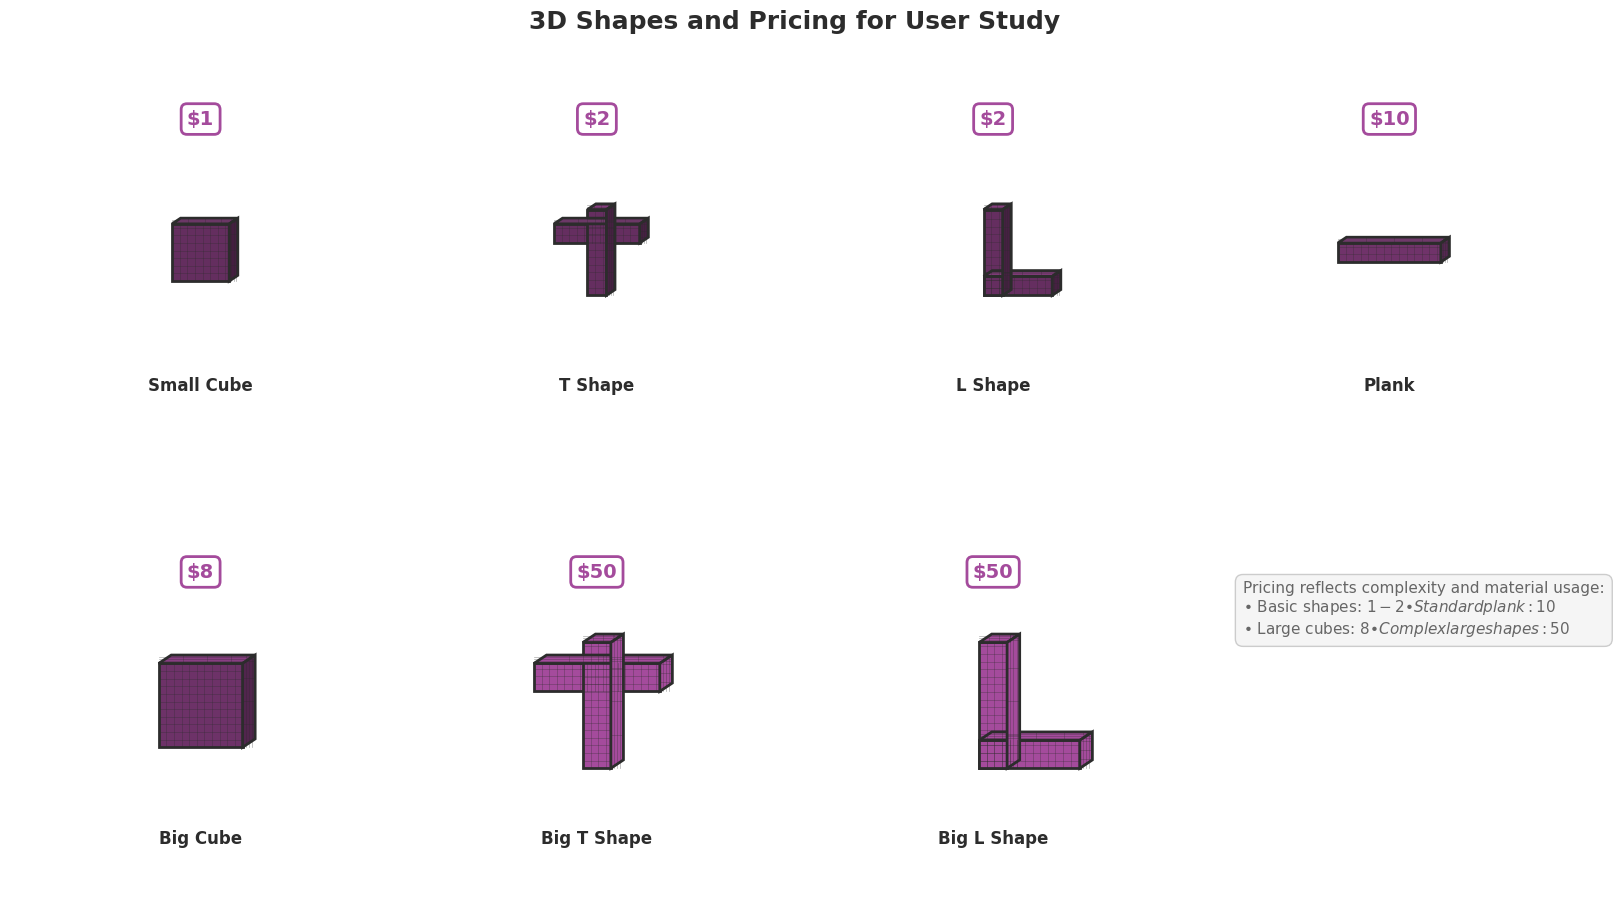

In [27]:
# 3D Shapes Visualization Grid for User Study - With Grid Texture
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, Polygon
import numpy as np
from matplotlib import image as mpimg

# Color scheme - consistent with previous visualizations
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"

# Shape data with prices
shapes_data = [
    {"name": "Small Cube", "price": 1, "type": "cube", "size": "small"},
    {"name": "T Shape", "price": 2, "type": "t", "size": "small"},
    {"name": "L Shape", "price": 2, "type": "l", "size": "small"},
    {"name": "Plank", "price": 10, "type": "plank", "size": "small"},
    {"name": "Big Cube", "price": 8, "type": "cube", "size": "big"},
    {"name": "Big T Shape", "price": 50, "type": "t", "size": "big"},
    {"name": "Big L Shape", "price": 50, "type": "l", "size": "big"}
]

# Create figure with grid layout
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('3D Shapes and Pricing for User Study', fontsize=18, fontweight='bold', color=dark_gray, y=0.95)

# Remove the last subplot (we have 7 shapes, 2x4 grid)
fig.delaxes(axes[1, 3])

def draw_shape(ax, shape_data):
    """Draw a 2D representation of the 3D shape"""
    shape_type = shape_data["type"]
    size = shape_data["size"]
    
    # Base unit size - made larger
    unit = 0.15 if size == "small" else 0.22
    
    # Center position
    center_x, center_y = 0.5, 0.5
    
    # FIXED: Much smaller perspective offsets - no more distortion
    depth_offset_x = unit * 0.15  # Much smaller
    depth_offset_y = unit * 0.1   # Much smaller
    
    # Color based on price - NO TRANSPARENCY
    price_ratio = shape_data["price"] / 50
    base_color = [int(accent_purple[i:i+2], 16)/255 for i in (1, 3, 5)]
    
    # Three distinct solid colors for the three faces
    front_color = [c * (0.6 + 0.4 * price_ratio) for c in base_color]
    top_color = [c * (0.8 + 0.2 * price_ratio) for c in base_color]
    right_color = [c * (0.4 + 0.6 * price_ratio) for c in base_color]
    
    # Grid texture function
    def add_grid_texture(ax, bbox_coords, face_color):
        """Add grid texture to a rectangular area"""
        x0, y0, x1, y1 = bbox_coords
        
        # Draw the solid face first
        rect = Rectangle((x0, y0), x1-x0, y1-y0, 
                        facecolor=face_color, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(rect)
        
        # Add grid texture
        grid_spacing = 0.02
        x_lines = np.arange(x0, x1, grid_spacing)
        y_lines = np.arange(y0, y1, grid_spacing)
        
        # Vertical grid lines
        for x in x_lines:
            ax.plot([x, x], [y0, y1], color=dark_gray, linewidth=0.5, alpha=0.4)
        
        # Horizontal grid lines
        for y in y_lines:
            ax.plot([x0, x1], [y, y], color=dark_gray, linewidth=0.5, alpha=0.4)
    
    def add_grid_texture_polygon(ax, points, face_color):
        """Add grid texture to a polygon"""
        # Draw the solid face first
        poly = Polygon(points, facecolor=face_color, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(poly)
        
        # Add simplified grid pattern for polygons
        # Calculate center and add cross-hatch pattern
        center_x = sum(p[0] for p in points) / len(points)
        center_y = sum(p[1] for p in points) / len(points)
        
        # Get approximate bounds
        min_x = min(p[0] for p in points)
        max_x = max(p[0] for p in points)
        min_y = min(p[1] for p in points)
        max_y = max(p[1] for p in points)
        
        # Add grid lines within bounds
        for i in range(3):
            x = min_x + (max_x - min_x) * (i + 1) / 4
            ax.plot([x, x], [min_y, max_y], color=dark_gray, linewidth=0.5, alpha=0.4)
        
        for i in range(3):
            y = min_y + (max_y - min_y) * (i + 1) / 4
            ax.plot([min_x, max_x], [y, y], color=dark_gray, linewidth=0.5, alpha=0.4)
    
    if shape_type == "cube":
        # Front face
        add_grid_texture(ax, [center_x - unit/2, center_y - unit/2, 
                             center_x + unit/2, center_y + unit/2], front_color)
        
        # Top face
        top_points = [[center_x - unit/2, center_y + unit/2],
                     [center_x - unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2, center_y + unit/2]]
        add_grid_texture_polygon(ax, top_points, top_color)
        
        # Right face
        right_points = [[center_x + unit/2, center_y - unit/2],
                       [center_x + unit/2, center_y + unit/2],
                       [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit/2 + depth_offset_x, center_y - unit/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, right_points, right_color)
        
    elif shape_type == "t":
        # Front faces
        add_grid_texture(ax, [center_x - unit*1.5/2, center_y + unit/6, 
                             center_x + unit*1.5/2, center_y + unit/2], front_color)
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit/6, center_y + unit*1.5/2], front_color)
        
        # Top faces
        h_top_points = [[center_x - unit*1.5/2, center_y + unit/2],
                       [center_x - unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit*1.5/2, center_y + unit/2]]
        add_grid_texture_polygon(ax, h_top_points, top_color)
        
        v_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                       [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6, center_y + unit*1.5/2]]
        add_grid_texture_polygon(ax, v_top_points, top_color)
        
        # Right faces
        h_right_points = [[center_x + unit*1.5/2, center_y + unit/6],
                         [center_x + unit*1.5/2, center_y + unit/2],
                         [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                         [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/6 + depth_offset_y]]
        add_grid_texture_polygon(ax, h_right_points, right_color)
        
        v_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                         [center_x + unit/6, center_y + unit*1.5/2],
                         [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                         [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, v_right_points, right_color)
        
    elif shape_type == "l":
        # Front faces
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit/6, center_y + unit*1.5/2], front_color)
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3], front_color)
        
        # Top faces
        v_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                       [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6, center_y + unit*1.5/2]]
        add_grid_texture_polygon(ax, v_top_points, top_color)
        
        h_top_points = [[center_x - unit/6, center_y - unit*1.5/2 + unit/3],
                       [center_x - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                       [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                       [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3]]
        add_grid_texture_polygon(ax, h_top_points, top_color)
        
        # Right faces
        v_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                         [center_x + unit/6, center_y + unit*1.5/2],
                         [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                         [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, v_right_points, right_color)
        
        h_right_points = [[center_x + unit*1.2 - unit/6, center_y - unit*1.5/2],
                         [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3],
                         [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                         [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, h_right_points, right_color)
        
    elif shape_type == "plank":
        # Front face
        add_grid_texture(ax, [center_x - unit*1.8/2, center_y - unit/6, 
                             center_x + unit*1.8/2, center_y + unit/6], front_color)
        
        # Top face
        top_points = [[center_x - unit*1.8/2, center_y + unit/6],
                     [center_x - unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                     [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                     [center_x + unit*1.8/2, center_y + unit/6]]
        add_grid_texture_polygon(ax, top_points, top_color)
        
        # Right face
        right_points = [[center_x + unit*1.8/2, center_y - unit/6],
                       [center_x + unit*1.8/2, center_y + unit/6],
                       [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                       [center_x + unit*1.8/2 + depth_offset_x, center_y - unit/6 + depth_offset_y]]
        add_grid_texture_polygon(ax, right_points, right_color)

# Draw all shapes
for i, shape_data in enumerate(shapes_data):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    draw_shape(ax, shape_data)
    
    # Add shape name
    ax.text(0.5, 0.15, shape_data["name"], ha='center', va='center', 
            fontsize=12, fontweight='bold', color=dark_gray)
    
    # Add price with prominent styling
    price_text = f"${shape_data['price']}"
    ax.text(0.5, 0.85, price_text, ha='center', va='center', 
            fontsize=14, fontweight='bold', color=accent_purple,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                     edgecolor=accent_purple, linewidth=2))
    
    # Set axis properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')

# Add pricing legend
legend_text = """Pricing reflects complexity and material usage:
• Basic shapes: $1-2 • Standard plank: $10
• Large cubes: $8 • Complex large shapes: $50"""

fig.text(0.78, 0.35, legend_text, ha='left', va='center', fontsize=11, 
         color=medium_gray, bbox=dict(boxstyle="round,pad=0.5", 
         facecolor=light_gray, edgecolor=border_gray))

plt.tight_layout()
plt.savefig("../assets/05/shapes-pricing-grid.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


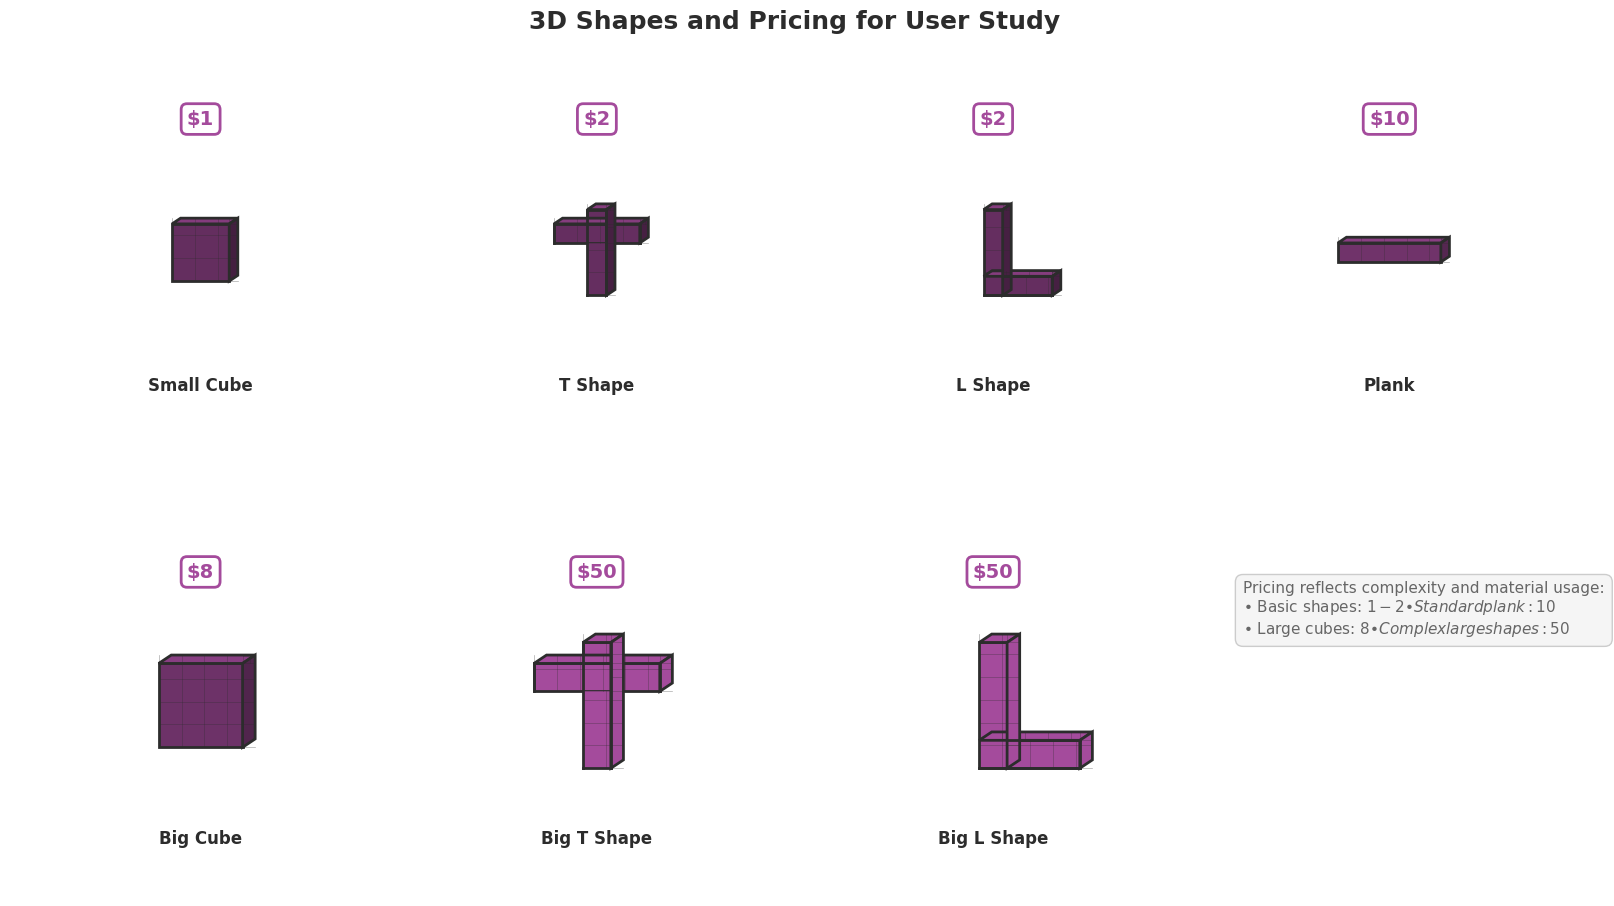

In [26]:
# 3D Shapes Visualization Grid for User Study - FIXED VERSION
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, Polygon
import numpy as np

# Color scheme - consistent with previous visualizations
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"

# Shape data with prices
shapes_data = [
    {"name": "Small Cube", "price": 1, "type": "cube", "size": "small"},
    {"name": "T Shape", "price": 2, "type": "t", "size": "small"},
    {"name": "L Shape", "price": 2, "type": "l", "size": "small"},
    {"name": "Plank", "price": 10, "type": "plank", "size": "small"},
    {"name": "Big Cube", "price": 8, "type": "cube", "size": "big"},
    {"name": "Big T Shape", "price": 50, "type": "t", "size": "big"},
    {"name": "Big L Shape", "price": 50, "type": "l", "size": "big"}
]

# Create figure with grid layout
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('3D Shapes and Pricing for User Study', fontsize=18, fontweight='bold', color=dark_gray, y=0.95)

# Remove the last subplot (we have 7 shapes, 2x4 grid)
fig.delaxes(axes[1, 3])

def draw_shape(ax, shape_data):
    """Draw a 2D representation of the 3D shape"""
    shape_type = shape_data["type"]
    size = shape_data["size"]
    
    # Base unit size - made larger
    unit = 0.15 if size == "small" else 0.22
    
    # Center position
    center_x, center_y = 0.5, 0.5
    
    # FIXED: Much smaller perspective offsets - no more distortion
    depth_offset_x = unit * 0.15  # Much smaller
    depth_offset_y = unit * 0.1   # Much smaller
    
    # Color based on price - NO TRANSPARENCY
    price_ratio = shape_data["price"] / 50
    base_color = [int(accent_purple[i:i+2], 16)/255 for i in (1, 3, 5)]
    
    # Three distinct solid colors for the three faces
    front_color = [c * (0.6 + 0.4 * price_ratio) for c in base_color]
    top_color = [c * (0.8 + 0.2 * price_ratio) for c in base_color]
    right_color = [c * (0.4 + 0.6 * price_ratio) for c in base_color]
    
    # FIXED: Grid texture function with proper scaling and border control
    def add_grid_texture(ax, bbox_coords, face_color, draw_border=True):
        """Add grid texture to a rectangular area"""
        x0, y0, x1, y1 = bbox_coords
        
        # Draw the solid face first
        if draw_border:
            rect = Rectangle((x0, y0), x1-x0, y1-y0, 
                            facecolor=face_color, edgecolor=dark_gray, linewidth=2)
        else:
            rect = Rectangle((x0, y0), x1-x0, y1-y0, 
                            facecolor=face_color, edgecolor='none')
        ax.add_patch(rect)
        
        # Add grid texture - SCALED UP by 3x
        grid_spacing = 0.06  # Changed from 0.02 to 0.06 (3x larger)
        
        # Calculate grid lines within the rectangle bounds
        x_lines = np.arange(x0, x1 + grid_spacing, grid_spacing)
        y_lines = np.arange(y0, y1 + grid_spacing, grid_spacing)
        
        # Vertical grid lines
        for x in x_lines:
            if x0 <= x <= x1:  # Only draw within bounds
                ax.plot([x, x], [y0, y1], color=dark_gray, linewidth=0.5, alpha=0.4)
        
        # Horizontal grid lines
        for y in y_lines:
            if y0 <= y <= y1:  # Only draw within bounds
                ax.plot([x0, x1], [y, y], color=dark_gray, linewidth=0.5, alpha=0.4)
    
    def add_grid_texture_polygon(ax, points, face_color, draw_border=True):
        """Add grid texture to a polygon"""
        # Draw the solid face first
        if draw_border:
            poly = Polygon(points, facecolor=face_color, edgecolor=dark_gray, linewidth=2)
        else:
            poly = Polygon(points, facecolor=face_color, edgecolor='none')
        ax.add_patch(poly)
        
        # Add simplified grid pattern for polygons
        # Get approximate bounds
        min_x = min(p[0] for p in points)
        max_x = max(p[0] for p in points)
        min_y = min(p[1] for p in points)
        max_y = max(p[1] for p in points)
        
        # Add grid lines with 3x larger spacing
        grid_spacing = 0.06  # 3x larger
        
        # Vertical grid lines
        x_lines = np.arange(min_x, max_x + grid_spacing, grid_spacing)
        for x in x_lines:
            if min_x <= x <= max_x:
                ax.plot([x, x], [min_y, max_y], color=dark_gray, linewidth=0.5, alpha=0.4)
        
        # Horizontal grid lines
        y_lines = np.arange(min_y, max_y + grid_spacing, grid_spacing)
        for y in y_lines:
            if min_y <= y <= max_y:
                ax.plot([min_x, max_x], [y, y], color=dark_gray, linewidth=0.5, alpha=0.4)
    
    if shape_type == "cube":
        # Front face
        add_grid_texture(ax, [center_x - unit/2, center_y - unit/2, 
                             center_x + unit/2, center_y + unit/2], front_color)
        
        # Top face
        top_points = [[center_x - unit/2, center_y + unit/2],
                     [center_x - unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2, center_y + unit/2]]
        add_grid_texture_polygon(ax, top_points, top_color)
        
        # Right face
        right_points = [[center_x + unit/2, center_y - unit/2],
                       [center_x + unit/2, center_y + unit/2],
                       [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit/2 + depth_offset_x, center_y - unit/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, right_points, right_color)
        
    elif shape_type == "t":
        # FIXED: Front faces with selective borders - no border on overlapping areas
        # Horizontal bar front face
        add_grid_texture(ax, [center_x - unit*1.5/2, center_y + unit/6, 
                             center_x + unit*1.5/2, center_y + unit/2], front_color)
        
        # Vertical bar front face - no border where it overlaps with horizontal
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit/6, center_y + unit/6], front_color, draw_border=False)
        add_grid_texture(ax, [center_x - unit/6, center_y + unit/2, 
                             center_x + unit/6, center_y + unit*1.5/2], front_color)
        
        # Draw only the outer borders for the overlapping area
        # Left border of vertical bar
        ax.plot([center_x - unit/6, center_x - unit/6], [center_y - unit*1.5/2, center_y + unit*1.5/2], 
               color=dark_gray, linewidth=2)
        # Right border of vertical bar
        ax.plot([center_x + unit/6, center_x + unit/6], [center_y - unit*1.5/2, center_y + unit*1.5/2], 
               color=dark_gray, linewidth=2)
        # Bottom border of vertical bar
        ax.plot([center_x - unit/6, center_x + unit/6], [center_y - unit*1.5/2, center_y - unit*1.5/2], 
               color=dark_gray, linewidth=2)
        # Left border of horizontal bar
        ax.plot([center_x - unit*1.5/2, center_x - unit*1.5/2], [center_y + unit/6, center_y + unit/2], 
               color=dark_gray, linewidth=2)
        # Right border of horizontal bar
        ax.plot([center_x + unit*1.5/2, center_x + unit*1.5/2], [center_y + unit/6, center_y + unit/2], 
               color=dark_gray, linewidth=2)
        
        # Top faces
        h_top_points = [[center_x - unit*1.5/2, center_y + unit/2],
                       [center_x - unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit*1.5/2, center_y + unit/2]]
        add_grid_texture_polygon(ax, h_top_points, top_color)
        
        v_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                       [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6, center_y + unit*1.5/2]]
        add_grid_texture_polygon(ax, v_top_points, top_color)
        
        # Right faces
        h_right_points = [[center_x + unit*1.5/2, center_y + unit/6],
                         [center_x + unit*1.5/2, center_y + unit/2],
                         [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                         [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/6 + depth_offset_y]]
        add_grid_texture_polygon(ax, h_right_points, right_color)
        
        v_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                         [center_x + unit/6, center_y + unit*1.5/2],
                         [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                         [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, v_right_points, right_color)
        
    elif shape_type == "l":
        # FIXED: Front faces with selective borders - no border on overlapping areas
        # Vertical bar front face
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit/6, center_y + unit*1.5/2], front_color)
        
        # Horizontal bar front face - no border where it overlaps with vertical
        add_grid_texture(ax, [center_x + unit/6, center_y - unit*1.5/2, 
                             center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3], front_color)
        
        # Draw only the outer borders for the overlapping area
        # Bottom border of horizontal bar
        ax.plot([center_x - unit/6, center_x + unit*1.2 - unit/6], 
               [center_y - unit*1.5/2, center_y - unit*1.5/2], color=dark_gray, linewidth=2)
        # Top border of horizontal bar
        ax.plot([center_x + unit/6, center_x + unit*1.2 - unit/6], 
               [center_y - unit*1.5/2 + unit/3, center_y - unit*1.5/2 + unit/3], color=dark_gray, linewidth=2)
        # Right border of horizontal bar
        ax.plot([center_x + unit*1.2 - unit/6, center_x + unit*1.2 - unit/6], 
               [center_y - unit*1.5/2, center_y - unit*1.5/2 + unit/3], color=dark_gray, linewidth=2)
        
        # Top faces
        v_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                       [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6, center_y + unit*1.5/2]]
        add_grid_texture_polygon(ax, v_top_points, top_color)
        
        h_top_points = [[center_x - unit/6, center_y - unit*1.5/2 + unit/3],
                       [center_x - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                       [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                       [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3]]
        add_grid_texture_polygon(ax, h_top_points, top_color)
        
        # Right faces
        v_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                         [center_x + unit/6, center_y + unit*1.5/2],
                         [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                         [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, v_right_points, right_color)
        
        h_right_points = [[center_x + unit*1.2 - unit/6, center_y - unit*1.5/2],
                         [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3],
                         [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                         [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, h_right_points, right_color)
        
    elif shape_type == "plank":
        # Front face
        add_grid_texture(ax, [center_x - unit*1.8/2, center_y - unit/6, 
                             center_x + unit*1.8/2, center_y + unit/6], front_color)
        
        # Top face
        top_points = [[center_x - unit*1.8/2, center_y + unit/6],
                     [center_x - unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                     [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                     [center_x + unit*1.8/2, center_y + unit/6]]
        add_grid_texture_polygon(ax, top_points, top_color)
        
        # Right face
        right_points = [[center_x + unit*1.8/2, center_y - unit/6],
                       [center_x + unit*1.8/2, center_y + unit/6],
                       [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                       [center_x + unit*1.8/2 + depth_offset_x, center_y - unit/6 + depth_offset_y]]
        add_grid_texture_polygon(ax, right_points, right_color)

# Draw all shapes
for i, shape_data in enumerate(shapes_data):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    draw_shape(ax, shape_data)
    
    # Add shape name
    ax.text(0.5, 0.15, shape_data["name"], ha='center', va='center', 
            fontsize=12, fontweight='bold', color=dark_gray)
    
    # Add price with prominent styling
    price_text = f"${shape_data['price']}"
    ax.text(0.5, 0.85, price_text, ha='center', va='center', 
            fontsize=14, fontweight='bold', color=accent_purple,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                     edgecolor=accent_purple, linewidth=2))
    
    # Set axis properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')

# Add pricing legend
legend_text = """Pricing reflects complexity and material usage:
• Basic shapes: $1-2 • Standard plank: $10
• Large cubes: $8 • Complex large shapes: $50"""

fig.text(0.78, 0.35, legend_text, ha='left', va='center', fontsize=11, 
         color=medium_gray, bbox=dict(boxstyle="round,pad=0.5", 
         facecolor=light_gray, edgecolor=border_gray))

plt.tight_layout()
plt.savefig("../assets/05/shapes-pricing-grid.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


Grid texture loaded successfully


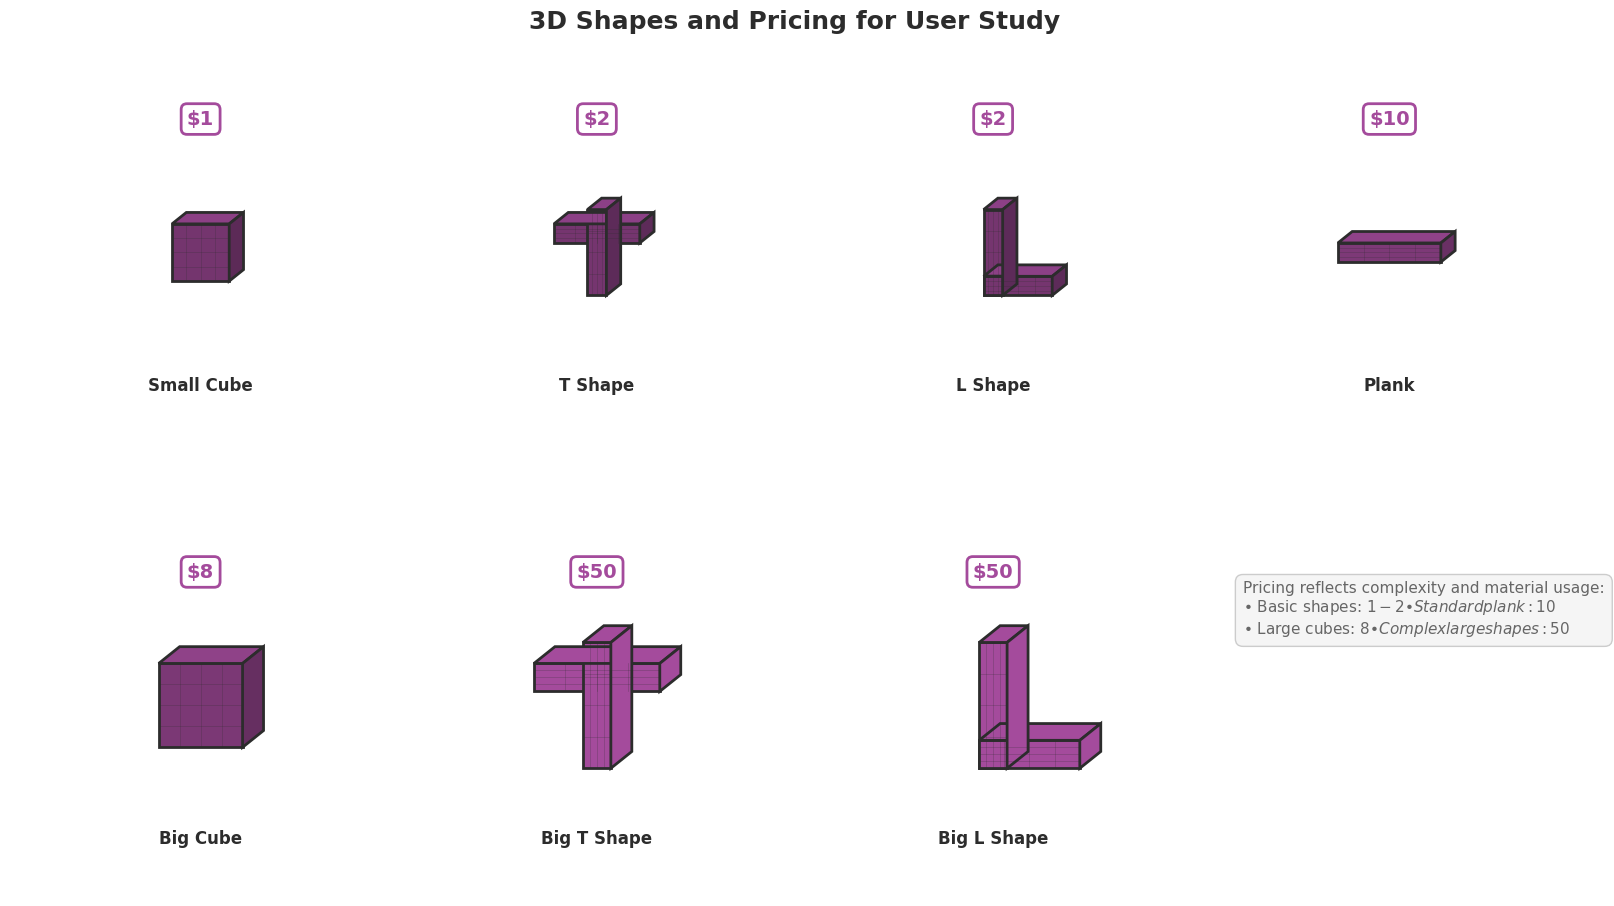

In [28]:
# 3D Shapes Visualization Grid for User Study - With Grid Texture
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, Polygon
import numpy as np
from matplotlib import image as mpimg
import matplotlib.patches as mpatches

# Color scheme - consistent with previous visualizations
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"

# Load grid texture
try:
    grid_texture = mpimg.imread('../user-study-analysis/grid-texture.png')
    has_texture = True
    print("Grid texture loaded successfully")
except:
    has_texture = False
    print("Grid texture not found, creating programmatic grid pattern")

# Create programmatic grid pattern if texture file not found
def create_grid_pattern(size=64):
    """Create a simple grid pattern"""
    pattern = np.ones((size, size, 3))
    grid_color = 0.8
    line_width = 2
    
    # Create grid lines
    pattern[::size//8, :] = grid_color
    pattern[:, ::size//8] = grid_color
    pattern[:line_width, :] = grid_color
    pattern[:, :line_width] = grid_color
    
    return pattern

if not has_texture:
    grid_texture = create_grid_pattern()

# Shape data with prices
shapes_data = [
    {"name": "Small Cube", "price": 1, "type": "cube", "size": "small"},
    {"name": "T Shape", "price": 2, "type": "t", "size": "small"},
    {"name": "L Shape", "price": 2, "type": "l", "size": "small"},
    {"name": "Plank", "price": 10, "type": "plank", "size": "small"},
    {"name": "Big Cube", "price": 8, "type": "cube", "size": "big"},
    {"name": "Big T Shape", "price": 50, "type": "t", "size": "big"},
    {"name": "Big L Shape", "price": 50, "type": "l", "size": "big"}
]

# Create figure with grid layout
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('3D Shapes and Pricing for User Study', fontsize=18, fontweight='bold', color=dark_gray, y=0.95)

# Remove the last subplot (we have 7 shapes, 2x4 grid)
fig.delaxes(axes[1, 3])

def draw_shape(ax, shape_data):
    """Draw a 2D representation of the 3D shape with grid texture"""
    shape_type = shape_data["type"]
    size = shape_data["size"]
    
    # Base unit size - made larger
    unit = 0.15 if size == "small" else 0.22
    
    # Center position
    center_x, center_y = 0.5, 0.5
    
    # 3D perspective offsets - reduced to prevent distortion
    depth_offset_x = unit * 0.25  # Reduced from 0.4 to 0.25
    depth_offset_y = unit * 0.2   # Reduced from 0.3 to 0.2
    
    # Color based on price (darker for more expensive, but no transparency)
    price_ratio = shape_data["price"] / 50  # Max price is 50
    shape_color = (accent_purple[1:3], accent_purple[3:5], accent_purple[5:7])
    shape_color = [int(c, 16)/255 for c in shape_color]
    
    # Create different shades for the three faces (no transparency)
    front_color = [c * (0.7 + 0.3 * price_ratio) for c in shape_color]
    top_color = [c * (0.85 + 0.15 * price_ratio) for c in shape_color]
    right_color = [c * (0.55 + 0.45 * price_ratio) for c in shape_color]
    
    def add_textured_patch(patch, face_type="front"):
        """Add a patch with grid texture overlay"""
        color = front_color if face_type == "front" else (top_color if face_type == "top" else right_color)
        patch.set_facecolor(color)
        patch.set_edgecolor(dark_gray)
        patch.set_linewidth(2)
        ax.add_patch(patch)
        
        # Add texture overlay (simplified for better performance)
        if hasattr(patch, 'get_bbox'):
            bbox = patch.get_bbox()
            # Simple cross-hatch pattern instead of full texture for better visibility
            if face_type == "front":
                # Add subtle grid lines
                x_center = (bbox.x0 + bbox.x1) / 2
                y_center = (bbox.y0 + bbox.y1) / 2
                width = bbox.x1 - bbox.x0
                height = bbox.y1 - bbox.y0
                
                # Draw subtle grid lines
                for i in range(3):
                    x_pos = bbox.x0 + width * (i + 1) / 4
                    ax.plot([x_pos, x_pos], [bbox.y0, bbox.y1], 
                           color=dark_gray, alpha=0.3, linewidth=0.5)
                    y_pos = bbox.y0 + height * (i + 1) / 4
                    ax.plot([bbox.x0, bbox.x1], [y_pos, y_pos], 
                           color=dark_gray, alpha=0.3, linewidth=0.5)
    
    if shape_type == "cube":
        # Draw isometric cube with better 3D perspective
        # Front face
        front = Rectangle((center_x - unit/2, center_y - unit/2), unit, unit)
        add_textured_patch(front, "front")
        
        # Top face (parallelogram with better perspective)
        top_points = [[center_x - unit/2, center_y + unit/2],
                     [center_x - unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2, center_y + unit/2]]
        top = Polygon(top_points)
        add_textured_patch(top, "top")
        
        # Right face (parallelogram)
        right_points = [[center_x + unit/2, center_y - unit/2],
                       [center_x + unit/2, center_y + unit/2],
                       [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit/2 + depth_offset_x, center_y - unit/2 + depth_offset_y]]
        right = Polygon(right_points)
        add_textured_patch(right, "right")
        
    elif shape_type == "t":
        # Draw T-shape with 3D depth
        # Front faces
        h_bar_front = Rectangle((center_x - unit*1.5/2, center_y + unit/6), unit*1.5, unit/3)
        add_textured_patch(h_bar_front, "front")
        
        v_bar_front = Rectangle((center_x - unit/6, center_y - unit*1.5/2), unit/3, unit*1.5)
        add_textured_patch(v_bar_front, "front")
        
        # Top faces for 3D effect
        h_bar_top_points = [[center_x - unit*1.5/2, center_y + unit/2],
                           [center_x - unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                           [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                           [center_x + unit*1.5/2, center_y + unit/2]]
        h_bar_top = Polygon(h_bar_top_points)
        add_textured_patch(h_bar_top, "top")
        
        v_bar_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                           [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                           [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                           [center_x + unit/6, center_y + unit*1.5/2]]
        v_bar_top = Polygon(v_bar_top_points)
        add_textured_patch(v_bar_top, "top")
        
        # Right faces
        h_bar_right_points = [[center_x + unit*1.5/2, center_y + unit/6],
                             [center_x + unit*1.5/2, center_y + unit/2],
                             [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                             [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/6 + depth_offset_y]]
        h_bar_right = Polygon(h_bar_right_points)
        add_textured_patch(h_bar_right, "right")
        
        v_bar_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                             [center_x + unit/6, center_y + unit*1.5/2],
                             [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                             [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        v_bar_right = Polygon(v_bar_right_points)
        add_textured_patch(v_bar_right, "right")
        
    elif shape_type == "l":
        # Draw L-shape with 3D depth
        # Front faces
        v_bar_front = Rectangle((center_x - unit/6, center_y - unit*1.5/2), unit/3, unit*1.5)
        add_textured_patch(v_bar_front, "front")
        
        h_bar_front = Rectangle((center_x - unit/6, center_y - unit*1.5/2), unit*1.2, unit/3)
        add_textured_patch(h_bar_front, "front")
        
        # Top faces for 3D effect
        v_bar_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                           [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                           [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                           [center_x + unit/6, center_y + unit*1.5/2]]
        v_bar_top = Polygon(v_bar_top_points)
        add_textured_patch(v_bar_top, "top")
        
        h_bar_top_points = [[center_x - unit/6, center_y - unit*1.5/2 + unit/3],
                           [center_x - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                           [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                           [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3]]
        h_bar_top = Polygon(h_bar_top_points)
        add_textured_patch(h_bar_top, "top")
        
        # Right faces
        v_bar_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                             [center_x + unit/6, center_y + unit*1.5/2],
                             [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                             [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        v_bar_right = Polygon(v_bar_right_points)
        add_textured_patch(v_bar_right, "right")
        
        h_bar_right_points = [[center_x + unit*1.2 - unit/6, center_y - unit*1.5/2],
                             [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3],
                             [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                             [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        h_bar_right = Polygon(h_bar_right_points)
        add_textured_patch(h_bar_right, "right")
        
    elif shape_type == "plank":
        # Draw plank with 3D depth
        # Front face
        plank_front = Rectangle((center_x - unit*1.8/2, center_y - unit/6), unit*1.8, unit/3)
        add_textured_patch(plank_front, "front")
        
        # Top face
        plank_top_points = [[center_x - unit*1.8/2, center_y + unit/6],
                           [center_x - unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                           [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                           [center_x + unit*1.8/2, center_y + unit/6]]
        plank_top = Polygon(plank_top_points)
        add_textured_patch(plank_top, "top")
        
        # Right face
        plank_right_points = [[center_x + unit*1.8/2, center_y - unit/6],
                             [center_x + unit*1.8/2, center_y + unit/6],
                             [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                             [center_x + unit*1.8/2 + depth_offset_x, center_y - unit/6 + depth_offset_y]]
        plank_right = Polygon(plank_right_points)
        add_textured_patch(plank_right, "right")

# Draw all shapes
for i, shape_data in enumerate(shapes_data):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    draw_shape(ax, shape_data)
    
    # Add shape name
    ax.text(0.5, 0.15, shape_data["name"], ha='center', va='center', 
            fontsize=12, fontweight='bold', color=dark_gray)
    
    # Add price with prominent styling
    price_text = f"${shape_data['price']}"
    ax.text(0.5, 0.85, price_text, ha='center', va='center', 
            fontsize=14, fontweight='bold', color=accent_purple,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                     edgecolor=accent_purple, linewidth=2))
    
    # Set axis properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')

# Add pricing legend
legend_text = """Pricing reflects complexity and material usage:
• Basic shapes: $1-2 • Standard plank: $10
• Large cubes: $8 • Complex large shapes: $50"""

fig.text(0.78, 0.35, legend_text, ha='left', va='center', fontsize=11, 
         color=medium_gray, bbox=dict(boxstyle="round,pad=0.5", 
         facecolor=light_gray, edgecolor=border_gray))

plt.tight_layout()
plt.savefig("../assets/05/shapes-pricing-grid.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


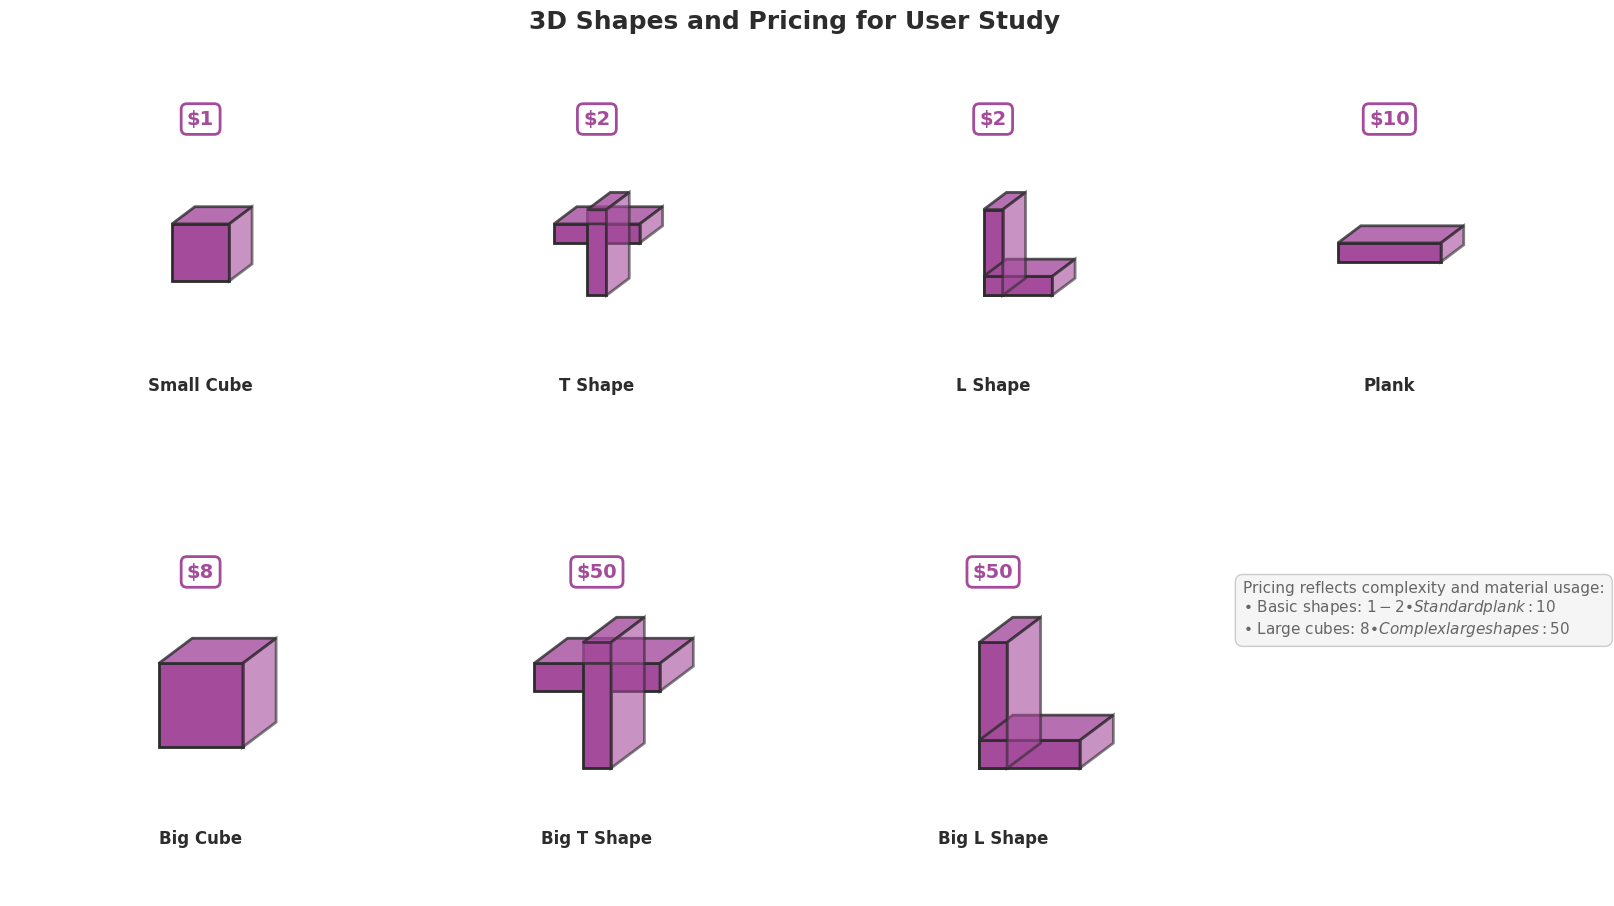

In [29]:
# 3D Shapes Visualization Grid for User Study
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, Polygon
import numpy as np

# Color scheme - consistent with previous visualizations
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"

# Shape data with prices
shapes_data = [
    {"name": "Small Cube", "price": 1, "type": "cube", "size": "small"},
    {"name": "T Shape", "price": 2, "type": "t", "size": "small"},
    {"name": "L Shape", "price": 2, "type": "l", "size": "small"},
    {"name": "Plank", "price": 10, "type": "plank", "size": "small"},
    {"name": "Big Cube", "price": 8, "type": "cube", "size": "big"},
    {"name": "Big T Shape", "price": 50, "type": "t", "size": "big"},
    {"name": "Big L Shape", "price": 50, "type": "l", "size": "big"}
]

# Create figure with grid layout
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('3D Shapes and Pricing for User Study', fontsize=18, fontweight='bold', color=dark_gray, y=0.95)

# Remove the last subplot (we have 7 shapes, 2x4 grid)
fig.delaxes(axes[1, 3])

def draw_shape(ax, shape_data):
    """Draw a 2D representation of the 3D shape"""
    shape_type = shape_data["type"]
    size = shape_data["size"]
    
    # Base unit size - made larger
    unit = 0.15 if size == "small" else 0.22
    
    # Center position
    center_x, center_y = 0.5, 0.5
    
    # 3D perspective offsets - improved for clearer 3D effect
    depth_offset_x = unit * 0.4  # Horizontal depth offset
    depth_offset_y = unit * 0.3  # Vertical depth offset
    
    # Color based on price (more expensive = darker)
    price_ratio = shape_data["price"] / 50  # Max price is 50
    shape_color = (accent_purple[1:3], accent_purple[3:5], accent_purple[5:7])
    shape_color = [int(c, 16)/255 for c in shape_color]
    alpha = 1  # 0.3 + 0.5 * price_ratio
    
    if shape_type == "cube":
        # Draw isometric cube with better 3D perspective
        # Front face
        front = Rectangle((center_x - unit/2, center_y - unit/2), unit, unit,
                         facecolor=shape_color, alpha=alpha, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(front)
        
        # Top face (parallelogram with better perspective)
        top_points = [[center_x - unit/2, center_y + unit/2],
                     [center_x - unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2, center_y + unit/2]]
        top = Polygon(top_points, facecolor=shape_color, alpha=alpha*0.8, 
                     edgecolor=dark_gray, linewidth=2)
        ax.add_patch(top)
        
        # Right face (parallelogram)
        right_points = [[center_x + unit/2, center_y - unit/2],
                       [center_x + unit/2, center_y + unit/2],
                       [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit/2 + depth_offset_x, center_y - unit/2 + depth_offset_y]]
        right = Polygon(right_points, facecolor=shape_color, alpha=alpha*0.6, 
                       edgecolor=dark_gray, linewidth=2)
        ax.add_patch(right)
        
    elif shape_type == "t":
        # Draw T-shape with 3D depth
        # Front faces
        h_bar_front = Rectangle((center_x - unit*1.5/2, center_y + unit/6), unit*1.5, unit/3,
                               facecolor=shape_color, alpha=alpha, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(h_bar_front)
        
        v_bar_front = Rectangle((center_x - unit/6, center_y - unit*1.5/2), unit/3, unit*1.5,
                               facecolor=shape_color, alpha=alpha, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(v_bar_front)
        
        # Top faces for 3D effect
        h_bar_top_points = [[center_x - unit*1.5/2, center_y + unit/2],
                           [center_x - unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                           [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                           [center_x + unit*1.5/2, center_y + unit/2]]
        h_bar_top = Polygon(h_bar_top_points, facecolor=shape_color, alpha=alpha*0.8, 
                           edgecolor=dark_gray, linewidth=2)
        ax.add_patch(h_bar_top)
        
        v_bar_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                           [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                           [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                           [center_x + unit/6, center_y + unit*1.5/2]]
        v_bar_top = Polygon(v_bar_top_points, facecolor=shape_color, alpha=alpha*0.8, 
                           edgecolor=dark_gray, linewidth=2)
        ax.add_patch(v_bar_top)
        
        # Right faces
        h_bar_right_points = [[center_x + unit*1.5/2, center_y + unit/6],
                             [center_x + unit*1.5/2, center_y + unit/2],
                             [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                             [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/6 + depth_offset_y]]
        h_bar_right = Polygon(h_bar_right_points, facecolor=shape_color, alpha=alpha*0.6, 
                             edgecolor=dark_gray, linewidth=2)
        ax.add_patch(h_bar_right)
        
        v_bar_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                             [center_x + unit/6, center_y + unit*1.5/2],
                             [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                             [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        v_bar_right = Polygon(v_bar_right_points, facecolor=shape_color, alpha=alpha*0.6, 
                             edgecolor=dark_gray, linewidth=2)
        ax.add_patch(v_bar_right)
        
    elif shape_type == "l":
        # Draw L-shape with 3D depth
        # Front faces
        v_bar_front = Rectangle((center_x - unit/6, center_y - unit*1.5/2), unit/3, unit*1.5,
                               facecolor=shape_color, alpha=alpha, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(v_bar_front)
        
        h_bar_front = Rectangle((center_x - unit/6, center_y - unit*1.5/2), unit*1.2, unit/3,
                               facecolor=shape_color, alpha=alpha, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(h_bar_front)
        
        # Top faces for 3D effect
        v_bar_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                           [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                           [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                           [center_x + unit/6, center_y + unit*1.5/2]]
        v_bar_top = Polygon(v_bar_top_points, facecolor=shape_color, alpha=alpha*0.8, 
                           edgecolor=dark_gray, linewidth=2)
        ax.add_patch(v_bar_top)
        
        h_bar_top_points = [[center_x - unit/6, center_y - unit*1.5/2 + unit/3],
                           [center_x - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                           [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                           [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3]]
        h_bar_top = Polygon(h_bar_top_points, facecolor=shape_color, alpha=alpha*0.8, 
                           edgecolor=dark_gray, linewidth=2)
        ax.add_patch(h_bar_top)
        
        # Right faces
        v_bar_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                             [center_x + unit/6, center_y + unit*1.5/2],
                             [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                             [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        v_bar_right = Polygon(v_bar_right_points, facecolor=shape_color, alpha=alpha*0.6, 
                             edgecolor=dark_gray, linewidth=2)
        ax.add_patch(v_bar_right)
        
        h_bar_right_points = [[center_x + unit*1.2 - unit/6, center_y - unit*1.5/2],
                             [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3],
                             [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                             [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        h_bar_right = Polygon(h_bar_right_points, facecolor=shape_color, alpha=alpha*0.6, 
                             edgecolor=dark_gray, linewidth=2)
        ax.add_patch(h_bar_right)
        
    elif shape_type == "plank":
        # Draw plank with 3D depth
        # Front face
        plank_front = Rectangle((center_x - unit*1.8/2, center_y - unit/6), unit*1.8, unit/3,
                               facecolor=shape_color, alpha=alpha, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(plank_front)
        
        # Top face
        plank_top_points = [[center_x - unit*1.8/2, center_y + unit/6],
                           [center_x - unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                           [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                           [center_x + unit*1.8/2, center_y + unit/6]]
        plank_top = Polygon(plank_top_points, facecolor=shape_color, alpha=alpha*0.8, 
                           edgecolor=dark_gray, linewidth=2)
        ax.add_patch(plank_top)
        
        # Right face
        plank_right_points = [[center_x + unit*1.8/2, center_y - unit/6],
                             [center_x + unit*1.8/2, center_y + unit/6],
                             [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                             [center_x + unit*1.8/2 + depth_offset_x, center_y - unit/6 + depth_offset_y]]
        plank_right = Polygon(plank_right_points, facecolor=shape_color, alpha=alpha*0.6, 
                             edgecolor=dark_gray, linewidth=2)
        ax.add_patch(plank_right)

# Draw all shapes
for i, shape_data in enumerate(shapes_data):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    draw_shape(ax, shape_data)
    
    # Add shape name
    ax.text(0.5, 0.15, shape_data["name"], ha='center', va='center', 
            fontsize=12, fontweight='bold', color=dark_gray)
    
    # Add price with prominent styling
    price_text = f"${shape_data['price']}"
    ax.text(0.5, 0.85, price_text, ha='center', va='center', 
            fontsize=14, fontweight='bold', color=accent_purple,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                     edgecolor=accent_purple, linewidth=2))
    
    # Set axis properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')

# Add pricing legend
legend_text = """Pricing reflects complexity and material usage:
• Basic shapes: $1-2 • Standard plank: $10
• Large cubes: $8 • Complex large shapes: $50"""

fig.text(0.78, 0.35, legend_text, ha='left', va='center', fontsize=11, 
         color=medium_gray, bbox=dict(boxstyle="round,pad=0.5", 
         facecolor=light_gray, edgecolor=border_gray))

plt.tight_layout()
plt.savefig("../assets/05/shapes-pricing-grid.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


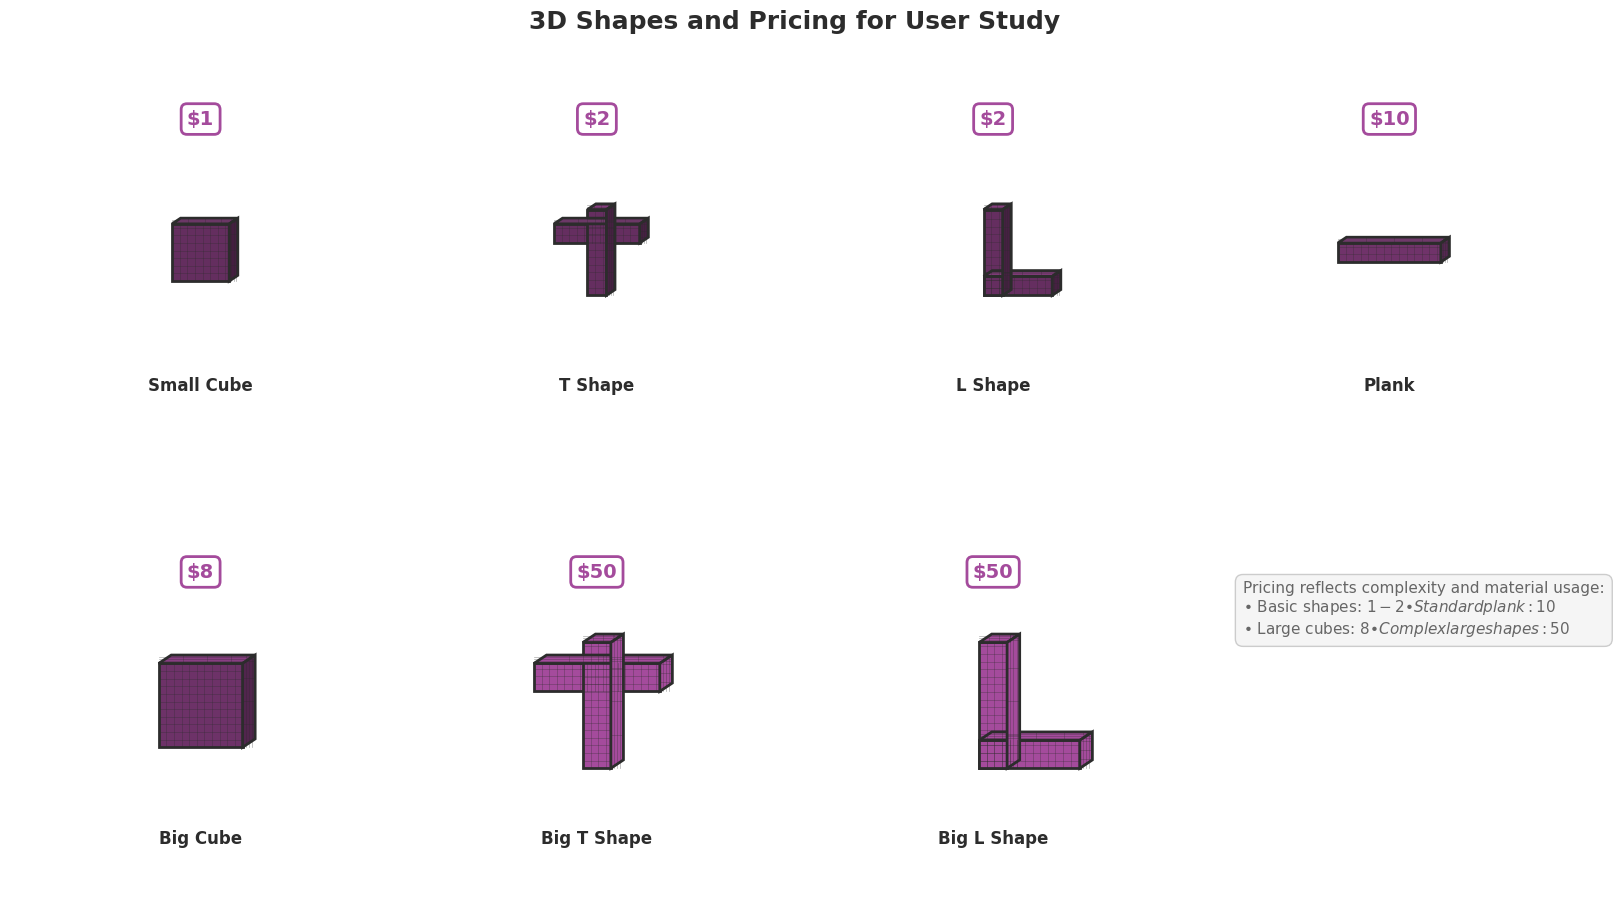

In [30]:




# 3D Shapes Visualization Grid for User Study - With Grid Texture
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, Polygon
import numpy as np
from matplotlib import image as mpimg

# Color scheme - consistent with previous visualizations
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"

# Shape data with prices
shapes_data = [
    {"name": "Small Cube", "price": 1, "type": "cube", "size": "small"},
    {"name": "T Shape", "price": 2, "type": "t", "size": "small"},
    {"name": "L Shape", "price": 2, "type": "l", "size": "small"},
    {"name": "Plank", "price": 10, "type": "plank", "size": "small"},
    {"name": "Big Cube", "price": 8, "type": "cube", "size": "big"},
    {"name": "Big T Shape", "price": 50, "type": "t", "size": "big"},
    {"name": "Big L Shape", "price": 50, "type": "l", "size": "big"}
]

# Create figure with grid layout
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('3D Shapes and Pricing for User Study', fontsize=18, fontweight='bold', color=dark_gray, y=0.95)

# Remove the last subplot (we have 7 shapes, 2x4 grid)
fig.delaxes(axes[1, 3])

def draw_shape(ax, shape_data):
    """Draw a 2D representation of the 3D shape"""
    shape_type = shape_data["type"]
    size = shape_data["size"]
    
    # Base unit size - made larger
    unit = 0.15 if size == "small" else 0.22
    
    # Center position
    center_x, center_y = 0.5, 0.5
    
    # FIXED: Much smaller perspective offsets - no more distortion
    depth_offset_x = unit * 0.15  # Much smaller
    depth_offset_y = unit * 0.1   # Much smaller
    
    # Color based on price - NO TRANSPARENCY
    price_ratio = shape_data["price"] / 50
    base_color = [int(accent_purple[i:i+2], 16)/255 for i in (1, 3, 5)]
    
    # Three distinct solid colors for the three faces
    front_color = [c * (0.6 + 0.4 * price_ratio) for c in base_color]
    top_color = [c * (0.8 + 0.2 * price_ratio) for c in base_color]
    right_color = [c * (0.4 + 0.6 * price_ratio) for c in base_color]
    
    # Grid texture function
    def add_grid_texture(ax, bbox_coords, face_color):
        """Add grid texture to a rectangular area"""
        x0, y0, x1, y1 = bbox_coords
        
        # Draw the solid face first
        rect = Rectangle((x0, y0), x1-x0, y1-y0, 
                        facecolor=face_color, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(rect)
        
        # Add grid texture
        grid_spacing = 0.02
        x_lines = np.arange(x0, x1, grid_spacing)
        y_lines = np.arange(y0, y1, grid_spacing)
        
        # Vertical grid lines
        for x in x_lines:
            ax.plot([x, x], [y0, y1], color=dark_gray, linewidth=0.5, alpha=0.4)
        
        # Horizontal grid lines
        for y in y_lines:
            ax.plot([x0, x1], [y, y], color=dark_gray, linewidth=0.5, alpha=0.4)
    
    def add_grid_texture_polygon(ax, points, face_color):
        """Add grid texture to a polygon"""
        # Draw the solid face first
        poly = Polygon(points, facecolor=face_color, edgecolor=dark_gray, linewidth=2)
        ax.add_patch(poly)
        
        # Add simplified grid pattern for polygons
        # Calculate center and add cross-hatch pattern
        center_x = sum(p[0] for p in points) / len(points)
        center_y = sum(p[1] for p in points) / len(points)
        
        # Get approximate bounds
        min_x = min(p[0] for p in points)
        max_x = max(p[0] for p in points)
        min_y = min(p[1] for p in points)
        max_y = max(p[1] for p in points)
        
        # Add grid lines within bounds
        for i in range(3):
            x = min_x + (max_x - min_x) * (i + 1) / 4
            ax.plot([x, x], [min_y, max_y], color=dark_gray, linewidth=0.5, alpha=0.4)
        
        for i in range(3):
            y = min_y + (max_y - min_y) * (i + 1) / 4
            ax.plot([min_x, max_x], [y, y], color=dark_gray, linewidth=0.5, alpha=0.4)
    
    if shape_type == "cube":
        # Front face
        add_grid_texture(ax, [center_x - unit/2, center_y - unit/2, 
                             center_x + unit/2, center_y + unit/2], front_color)
        
        # Top face
        top_points = [[center_x - unit/2, center_y + unit/2],
                     [center_x - unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2, center_y + unit/2]]
        add_grid_texture_polygon(ax, top_points, top_color)
        
        # Right face
        right_points = [[center_x + unit/2, center_y - unit/2],
                       [center_x + unit/2, center_y + unit/2],
                       [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit/2 + depth_offset_x, center_y - unit/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, right_points, right_color)
        
    elif shape_type == "t":
        # Front faces
        add_grid_texture(ax, [center_x - unit*1.5/2, center_y + unit/6, 
                             center_x + unit*1.5/2, center_y + unit/2], front_color)
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit/6, center_y + unit*1.5/2], front_color)
        
        # Top faces
        h_top_points = [[center_x - unit*1.5/2, center_y + unit/2],
                       [center_x - unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit*1.5/2, center_y + unit/2]]
        add_grid_texture_polygon(ax, h_top_points, top_color)
        
        v_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                       [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6, center_y + unit*1.5/2]]
        add_grid_texture_polygon(ax, v_top_points, top_color)
        
        # Right faces
        h_right_points = [[center_x + unit*1.5/2, center_y + unit/6],
                         [center_x + unit*1.5/2, center_y + unit/2],
                         [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                         [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/6 + depth_offset_y]]
        add_grid_texture_polygon(ax, h_right_points, right_color)
        
        v_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                         [center_x + unit/6, center_y + unit*1.5/2],
                         [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                         [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, v_right_points, right_color)
        
    elif shape_type == "l":
        # Front faces
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit/6, center_y + unit*1.5/2], front_color)
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3], front_color)
        
        # Top faces
        v_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                       [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6, center_y + unit*1.5/2]]
        add_grid_texture_polygon(ax, v_top_points, top_color)
        
        h_top_points = [[center_x - unit/6, center_y - unit*1.5/2 + unit/3],
                       [center_x - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                       [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                       [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3]]
        add_grid_texture_polygon(ax, h_top_points, top_color)
        
        # Right faces
        v_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                         [center_x + unit/6, center_y + unit*1.5/2],
                         [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                         [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, v_right_points, right_color)
        
        h_right_points = [[center_x + unit*1.2 - unit/6, center_y - unit*1.5/2],
                         [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3],
                         [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                         [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, h_right_points, right_color)
        
    elif shape_type == "plank":
        # Front face
        add_grid_texture(ax, [center_x - unit*1.8/2, center_y - unit/6, 
                             center_x + unit*1.8/2, center_y + unit/6], front_color)
        
        # Top face
        top_points = [[center_x - unit*1.8/2, center_y + unit/6],
                     [center_x - unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                     [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                     [center_x + unit*1.8/2, center_y + unit/6]]
        add_grid_texture_polygon(ax, top_points, top_color)
        
        # Right face
        right_points = [[center_x + unit*1.8/2, center_y - unit/6],
                       [center_x + unit*1.8/2, center_y + unit/6],
                       [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                       [center_x + unit*1.8/2 + depth_offset_x, center_y - unit/6 + depth_offset_y]]
        add_grid_texture_polygon(ax, right_points, right_color)

# Draw all shapes
for i, shape_data in enumerate(shapes_data):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    draw_shape(ax, shape_data)
    
    # Add shape name
    ax.text(0.5, 0.15, shape_data["name"], ha='center', va='center', 
            fontsize=12, fontweight='bold', color=dark_gray)
    
    # Add price with prominent styling
    price_text = f"${shape_data['price']}"
    ax.text(0.5, 0.85, price_text, ha='center', va='center', 
            fontsize=14, fontweight='bold', color=accent_purple,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                     edgecolor=accent_purple, linewidth=2))
    
    # Set axis properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')

# Add pricing legend
legend_text = """Pricing reflects complexity and material usage:
• Basic shapes: $1-2 • Standard plank: $10
• Large cubes: $8 • Complex large shapes: $50"""

fig.text(0.78, 0.35, legend_text, ha='left', va='center', fontsize=11, 
         color=medium_gray, bbox=dict(boxstyle="round,pad=0.5", 
         facecolor=light_gray, edgecolor=border_gray))

plt.tight_layout()
plt.savefig("../assets/05/shapes-pricing-grid.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

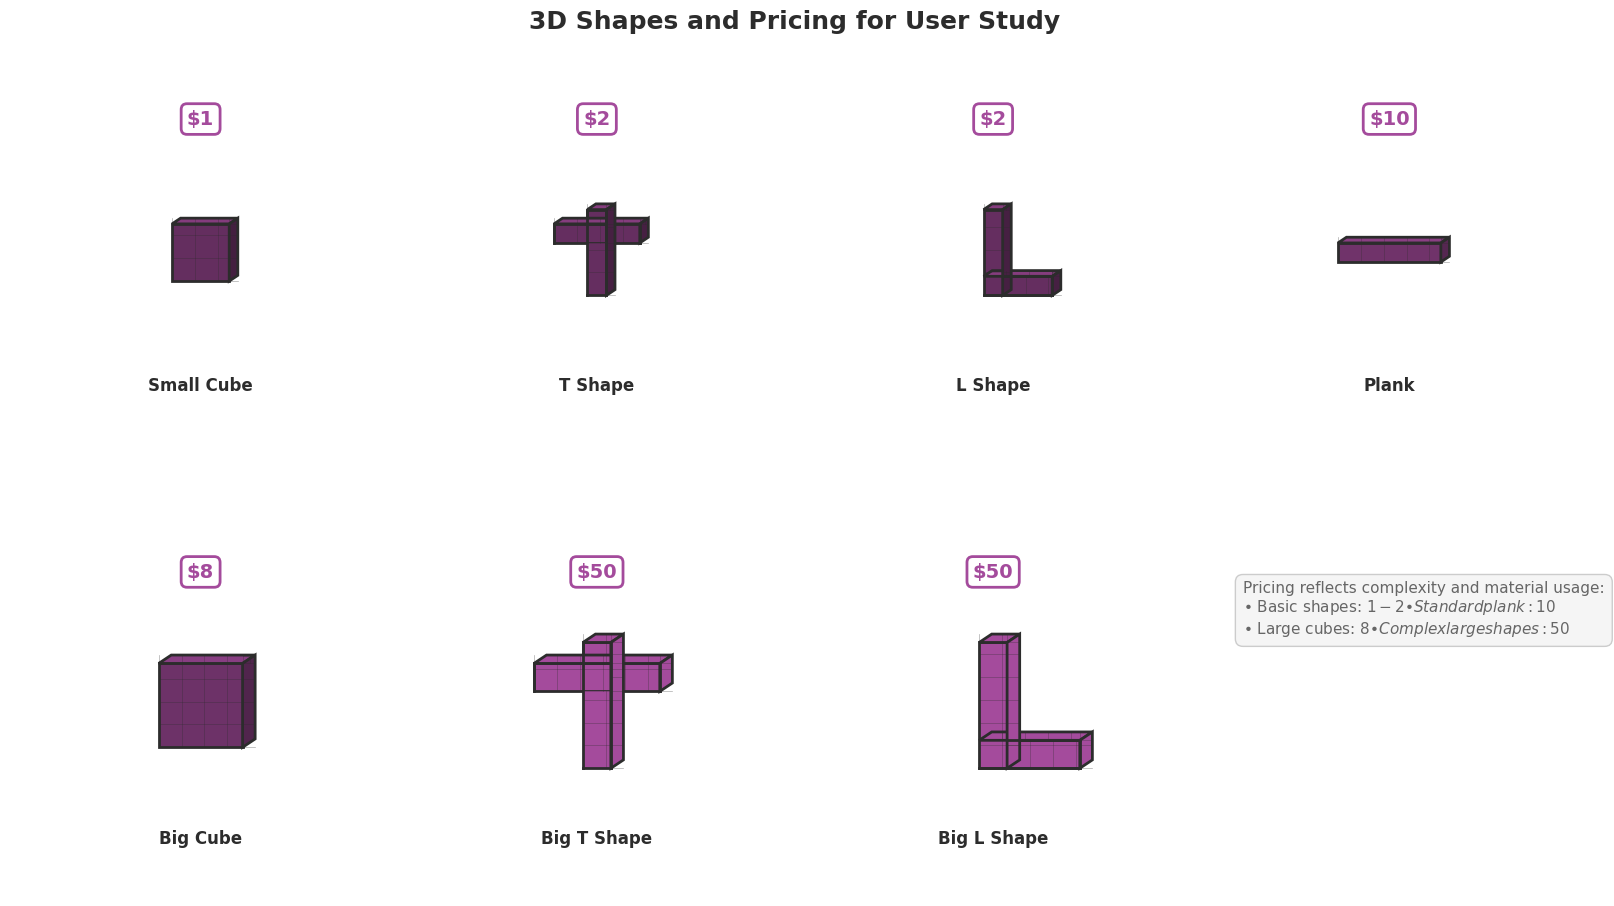

In [31]:


# 3D Shapes Visualization Grid for User Study - FIXED VERSION
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, Polygon
import numpy as np

# Color scheme - consistent with previous visualizations
accent_purple = "#a44b9c"
light_gray = "#f5f5f5"
dark_gray = "#2c2c2c"
medium_gray = "#666666"
border_gray = "#cccccc"

# Shape data with prices
shapes_data = [
    {"name": "Small Cube", "price": 1, "type": "cube", "size": "small"},
    {"name": "T Shape", "price": 2, "type": "t", "size": "small"},
    {"name": "L Shape", "price": 2, "type": "l", "size": "small"},
    {"name": "Plank", "price": 10, "type": "plank", "size": "small"},
    {"name": "Big Cube", "price": 8, "type": "cube", "size": "big"},
    {"name": "Big T Shape", "price": 50, "type": "t", "size": "big"},
    {"name": "Big L Shape", "price": 50, "type": "l", "size": "big"}
]

# Create figure with grid layout
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('3D Shapes and Pricing for User Study', fontsize=18, fontweight='bold', color=dark_gray, y=0.95)

# Remove the last subplot (we have 7 shapes, 2x4 grid)
fig.delaxes(axes[1, 3])

def draw_shape(ax, shape_data):
    """Draw a 2D representation of the 3D shape"""
    shape_type = shape_data["type"]
    size = shape_data["size"]
    
    # Base unit size - made larger
    unit = 0.15 if size == "small" else 0.22
    
    # Center position
    center_x, center_y = 0.5, 0.5
    
    # FIXED: Much smaller perspective offsets - no more distortion
    depth_offset_x = unit * 0.15  # Much smaller
    depth_offset_y = unit * 0.1   # Much smaller
    
    # Color based on price - NO TRANSPARENCY
    price_ratio = shape_data["price"] / 50
    base_color = [int(accent_purple[i:i+2], 16)/255 for i in (1, 3, 5)]
    
    # Three distinct solid colors for the three faces
    front_color = [c * (0.6 + 0.4 * price_ratio) for c in base_color]
    top_color = [c * (0.8 + 0.2 * price_ratio) for c in base_color]
    right_color = [c * (0.4 + 0.6 * price_ratio) for c in base_color]
    
    # FIXED: Grid texture function with proper scaling and border control
    def add_grid_texture(ax, bbox_coords, face_color, draw_border=True):
        """Add grid texture to a rectangular area"""
        x0, y0, x1, y1 = bbox_coords
        
        # Draw the solid face first
        if draw_border:
            rect = Rectangle((x0, y0), x1-x0, y1-y0, 
                            facecolor=face_color, edgecolor=dark_gray, linewidth=2)
        else:
            rect = Rectangle((x0, y0), x1-x0, y1-y0, 
                            facecolor=face_color, edgecolor='none')
        ax.add_patch(rect)
        
        # Add grid texture - SCALED UP by 3x
        grid_spacing = 0.06  # Changed from 0.02 to 0.06 (3x larger)
        
        # Calculate grid lines within the rectangle bounds
        x_lines = np.arange(x0, x1 + grid_spacing, grid_spacing)
        y_lines = np.arange(y0, y1 + grid_spacing, grid_spacing)
        
        # Vertical grid lines
        for x in x_lines:
            if x0 <= x <= x1:  # Only draw within bounds
                ax.plot([x, x], [y0, y1], color=dark_gray, linewidth=0.5, alpha=0.4)
        
        # Horizontal grid lines
        for y in y_lines:
            if y0 <= y <= y1:  # Only draw within bounds
                ax.plot([x0, x1], [y, y], color=dark_gray, linewidth=0.5, alpha=0.4)
    
    def add_grid_texture_polygon(ax, points, face_color, draw_border=True):
        """Add grid texture to a polygon"""
        # Draw the solid face first
        if draw_border:
            poly = Polygon(points, facecolor=face_color, edgecolor=dark_gray, linewidth=2)
        else:
            poly = Polygon(points, facecolor=face_color, edgecolor='none')
        ax.add_patch(poly)
        
        # Add simplified grid pattern for polygons
        # Get approximate bounds
        min_x = min(p[0] for p in points)
        max_x = max(p[0] for p in points)
        min_y = min(p[1] for p in points)
        max_y = max(p[1] for p in points)
        
        # Add grid lines with 3x larger spacing
        grid_spacing = 0.06  # 3x larger
        
        # Vertical grid lines
        x_lines = np.arange(min_x, max_x + grid_spacing, grid_spacing)
        for x in x_lines:
            if min_x <= x <= max_x:
                ax.plot([x, x], [min_y, max_y], color=dark_gray, linewidth=0.5, alpha=0.4)
        
        # Horizontal grid lines
        y_lines = np.arange(min_y, max_y + grid_spacing, grid_spacing)
        for y in y_lines:
            if min_y <= y <= max_y:
                ax.plot([min_x, max_x], [y, y], color=dark_gray, linewidth=0.5, alpha=0.4)
    
    if shape_type == "cube":
        # Front face
        add_grid_texture(ax, [center_x - unit/2, center_y - unit/2, 
                             center_x + unit/2, center_y + unit/2], front_color)
        
        # Top face
        top_points = [[center_x - unit/2, center_y + unit/2],
                     [center_x - unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                     [center_x + unit/2, center_y + unit/2]]
        add_grid_texture_polygon(ax, top_points, top_color)
        
        # Right face
        right_points = [[center_x + unit/2, center_y - unit/2],
                       [center_x + unit/2, center_y + unit/2],
                       [center_x + unit/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit/2 + depth_offset_x, center_y - unit/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, right_points, right_color)
        
    elif shape_type == "t":
        # FIXED: Front faces with selective borders - no border on overlapping areas
        # Horizontal bar front face
        add_grid_texture(ax, [center_x - unit*1.5/2, center_y + unit/6, 
                             center_x + unit*1.5/2, center_y + unit/2], front_color)
        
        # Vertical bar front face - no border where it overlaps with horizontal
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit/6, center_y + unit/6], front_color, draw_border=False)
        add_grid_texture(ax, [center_x - unit/6, center_y + unit/2, 
                             center_x + unit/6, center_y + unit*1.5/2], front_color)
        
        # Draw only the outer borders for the overlapping area
        # Left border of vertical bar
        ax.plot([center_x - unit/6, center_x - unit/6], [center_y - unit*1.5/2, center_y + unit*1.5/2], 
               color=dark_gray, linewidth=2)
        # Right border of vertical bar
        ax.plot([center_x + unit/6, center_x + unit/6], [center_y - unit*1.5/2, center_y + unit*1.5/2], 
               color=dark_gray, linewidth=2)
        # Bottom border of vertical bar
        ax.plot([center_x - unit/6, center_x + unit/6], [center_y - unit*1.5/2, center_y - unit*1.5/2], 
               color=dark_gray, linewidth=2)
        # Left border of horizontal bar
        ax.plot([center_x - unit*1.5/2, center_x - unit*1.5/2], [center_y + unit/6, center_y + unit/2], 
               color=dark_gray, linewidth=2)
        # Right border of horizontal bar
        ax.plot([center_x + unit*1.5/2, center_x + unit*1.5/2], [center_y + unit/6, center_y + unit/2], 
               color=dark_gray, linewidth=2)
        
        # Top faces
        h_top_points = [[center_x - unit*1.5/2, center_y + unit/2],
                       [center_x - unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                       [center_x + unit*1.5/2, center_y + unit/2]]
        add_grid_texture_polygon(ax, h_top_points, top_color)
        
        v_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                       [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6, center_y + unit*1.5/2]]
        add_grid_texture_polygon(ax, v_top_points, top_color)
        
        # Right faces
        h_right_points = [[center_x + unit*1.5/2, center_y + unit/6],
                         [center_x + unit*1.5/2, center_y + unit/2],
                         [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/2 + depth_offset_y],
                         [center_x + unit*1.5/2 + depth_offset_x, center_y + unit/6 + depth_offset_y]]
        add_grid_texture_polygon(ax, h_right_points, right_color)
        
        v_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                         [center_x + unit/6, center_y + unit*1.5/2],
                         [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                         [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, v_right_points, right_color)
        
    elif shape_type == "l":
        # FIXED: Front faces with selective borders - no border on overlapping areas
        # Vertical bar front face
        add_grid_texture(ax, [center_x - unit/6, center_y - unit*1.5/2, 
                             center_x + unit/6, center_y + unit*1.5/2], front_color)
        
        # Horizontal bar front face - no border where it overlaps with vertical
        add_grid_texture(ax, [center_x + unit/6, center_y - unit*1.5/2, 
                             center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3], front_color)
        
        # Draw only the outer borders for the overlapping area
        # Bottom border of horizontal bar
        ax.plot([center_x - unit/6, center_x + unit*1.2 - unit/6], 
               [center_y - unit*1.5/2, center_y - unit*1.5/2], color=dark_gray, linewidth=2)
        # Top border of horizontal bar
        ax.plot([center_x + unit/6, center_x + unit*1.2 - unit/6], 
               [center_y - unit*1.5/2 + unit/3, center_y - unit*1.5/2 + unit/3], color=dark_gray, linewidth=2)
        # Right border of horizontal bar
        ax.plot([center_x + unit*1.2 - unit/6, center_x + unit*1.2 - unit/6], 
               [center_y - unit*1.5/2, center_y - unit*1.5/2 + unit/3], color=dark_gray, linewidth=2)
        
        # Top faces
        v_top_points = [[center_x - unit/6, center_y + unit*1.5/2],
                       [center_x - unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                       [center_x + unit/6, center_y + unit*1.5/2]]
        add_grid_texture_polygon(ax, v_top_points, top_color)
        
        h_top_points = [[center_x - unit/6, center_y - unit*1.5/2 + unit/3],
                       [center_x - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                       [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                       [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3]]
        add_grid_texture_polygon(ax, h_top_points, top_color)
        
        # Right faces
        v_right_points = [[center_x + unit/6, center_y - unit*1.5/2],
                         [center_x + unit/6, center_y + unit*1.5/2],
                         [center_x + unit/6 + depth_offset_x, center_y + unit*1.5/2 + depth_offset_y],
                         [center_x + unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, v_right_points, right_color)
        
        h_right_points = [[center_x + unit*1.2 - unit/6, center_y - unit*1.5/2],
                         [center_x + unit*1.2 - unit/6, center_y - unit*1.5/2 + unit/3],
                         [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + unit/3 + depth_offset_y],
                         [center_x + unit*1.2 - unit/6 + depth_offset_x, center_y - unit*1.5/2 + depth_offset_y]]
        add_grid_texture_polygon(ax, h_right_points, right_color)
        
    elif shape_type == "plank":
        # Front face
        add_grid_texture(ax, [center_x - unit*1.8/2, center_y - unit/6, 
                             center_x + unit*1.8/2, center_y + unit/6], front_color)
        
        # Top face
        top_points = [[center_x - unit*1.8/2, center_y + unit/6],
                     [center_x - unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                     [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                     [center_x + unit*1.8/2, center_y + unit/6]]
        add_grid_texture_polygon(ax, top_points, top_color)
        
        # Right face
        right_points = [[center_x + unit*1.8/2, center_y - unit/6],
                       [center_x + unit*1.8/2, center_y + unit/6],
                       [center_x + unit*1.8/2 + depth_offset_x, center_y + unit/6 + depth_offset_y],
                       [center_x + unit*1.8/2 + depth_offset_x, center_y - unit/6 + depth_offset_y]]
        add_grid_texture_polygon(ax, right_points, right_color)

# Draw all shapes
for i, shape_data in enumerate(shapes_data):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    draw_shape(ax, shape_data)
    
    # Add shape name
    ax.text(0.5, 0.15, shape_data["name"], ha='center', va='center', 
            fontsize=12, fontweight='bold', color=dark_gray)
    
    # Add price with prominent styling
    price_text = f"${shape_data['price']}"
    ax.text(0.5, 0.85, price_text, ha='center', va='center', 
            fontsize=14, fontweight='bold', color=accent_purple,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                     edgecolor=accent_purple, linewidth=2))
    
    # Set axis properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')

# Add pricing legend
legend_text = """Pricing reflects complexity and material usage:
• Basic shapes: $1-2 • Standard plank: $10
• Large cubes: $8 • Complex large shapes: $50"""

fig.text(0.78, 0.35, legend_text, ha='left', va='center', fontsize=11, 
         color=medium_gray, bbox=dict(boxstyle="round,pad=0.5", 
         facecolor=light_gray, edgecolor=border_gray))

plt.tight_layout()
plt.savefig("../assets/05/shapes-pricing-grid.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Found 8 participant folders
Loaded 32 constructions


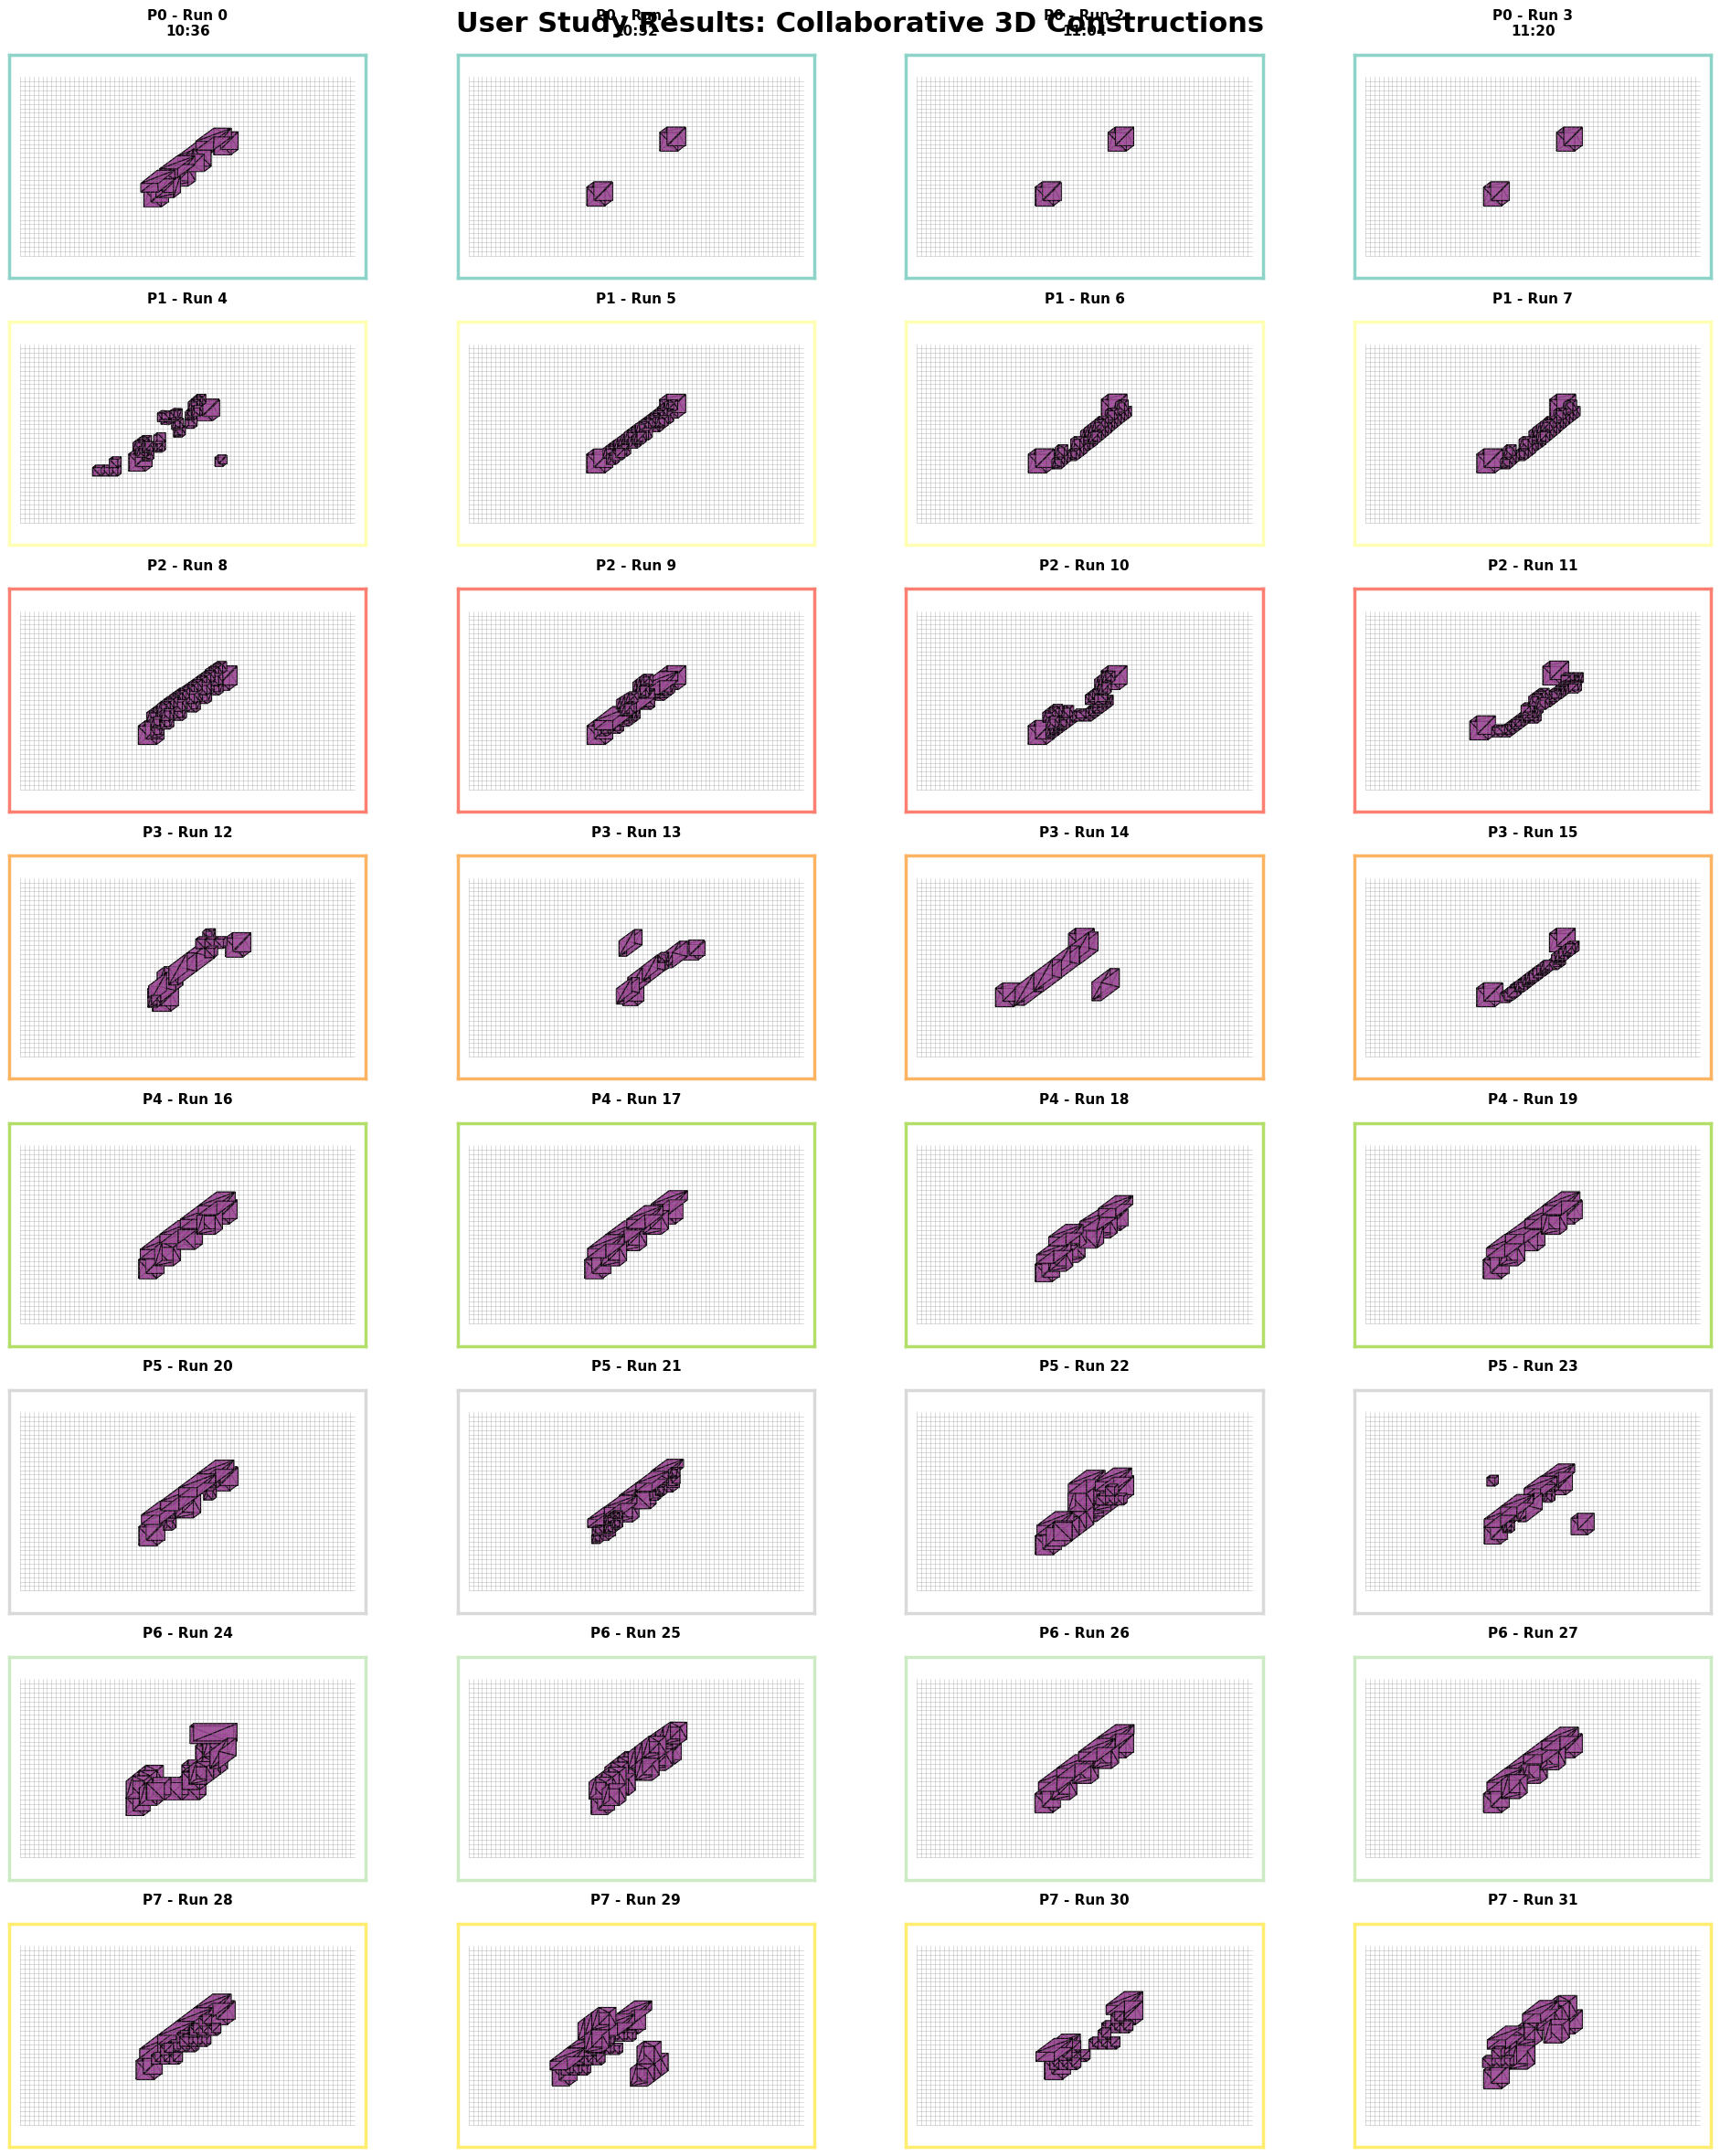

Successfully created improved visualization with 32 constructions
Saved to: ../assets/05/user-study-constructions.pdf


In [33]:
# User Study Results: All 32 Collaborative Constructions - Improved Layout
import os
import glob
import json
from pathlib import Path

def parse_obj_file(obj_path):
    """Parse an .obj file and extract basic geometric information"""
    vertices = []
    faces = []
    objects = []
    current_object = None
    
    try:
        with open(obj_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line.startswith('o '):  # Object definition
                    current_object = line[2:]
                    objects.append(current_object)
                elif line.startswith('v '):  # Vertex
                    coords = list(map(float, line.split()[1:4]))
                    vertices.append(coords)
                elif line.startswith('f '):  # Face
                    face_indices = []
                    for vertex_data in line.split()[1:]:
                        # Handle v/vt/vn format
                        vertex_index = int(vertex_data.split('/')[0]) - 1  # OBJ uses 1-based indexing
                        face_indices.append(vertex_index)
                    faces.append(face_indices)
    except Exception as e:
        print(f"Error parsing {obj_path}: {e}")
        return [], [], []
    
    return vertices, faces, objects

def get_bounding_box(vertices):
    """Calculate bounding box of vertices"""
    if not vertices:
        return (0, 0, 0), (0, 0, 0)
    
    x_coords = [v[0] for v in vertices]
    y_coords = [v[1] for v in vertices]
    z_coords = [v[2] for v in vertices]
    
    min_point = (min(x_coords), min(y_coords), min(z_coords))
    max_point = (max(x_coords), max(y_coords), max(z_coords))
    
    return min_point, max_point

def draw_3d_construction_improved(ax, vertices, faces, center_x, center_y, scale=1.0):
    """Draw an improved 3D representation of the construction with better scaling"""
    if not vertices or not faces:
        return
    
    # Calculate bounding box and normalize
    min_pt, max_pt = get_bounding_box(vertices)
    
    # Center the model
    center = [(min_pt[i] + max_pt[i]) / 2 for i in range(3)]
    normalized_vertices = [[v[i] - center[i] for i in range(3)] for v in vertices]
    
    # Much more aggressive scaling for better visibility
    size = max([max_pt[i] - min_pt[i] for i in range(3)])
    if size > 0:
        # Increased base scale dramatically - was (scale * 0.2) / size
        scale_factor = (scale * 0.6) / size  # 3x larger than original
        normalized_vertices = [[v[i] * scale_factor for i in range(3)] for v in normalized_vertices]
    
    # Improved isometric projection optimized for wide structures
    unit_size = 0.5  # Moderate unit size that fits well
    depth_offset_x = 0.2  # Good depth effect without overflow
    depth_offset_y = 0.15
    
    # Draw faces as simple polygons with improved rendering
    for face in faces:
        if len(face) >= 3:  # At least a triangle
            # Take first 3 vertices for triangular faces, or first 4 for quads
            face_vertices = face[:4] if len(face) >= 4 else face[:3]
            
            # Project vertices to 2D using isometric projection
            projected_points = []
            for vertex_idx in face_vertices:
                if 0 <= vertex_idx < len(normalized_vertices):
                    v = normalized_vertices[vertex_idx]
                    x = center_x + v[0] * unit_size + v[2] * depth_offset_x
                    y = center_y + v[1] * unit_size + v[2] * depth_offset_y
                    projected_points.append([x, y])
            
            if len(projected_points) >= 3:
                # Draw the face with improved styling
                face_polygon = plt.Polygon(projected_points, 
                                         facecolor=accent_purple, 
                                         alpha=0.8,  # Slightly more opaque
                                         edgecolor='black', 
                                         linewidth=0.8)  # Thicker edges for clarity
                ax.add_patch(face_polygon)

def draw_grid_texture_improved(ax, x, y, width, height):
    """Draw an improved grid texture pattern optimized for rectangular layouts"""
    grid_spacing = 0.02  # Slightly larger grid for better visibility
    
    # Vertical lines
    x_pos = x
    while x_pos <= x + width:
        ax.plot([x_pos, x_pos], [y, y + height], color='gray', linewidth=0.4, alpha=0.5)
        x_pos += grid_spacing
    
    # Horizontal lines
    y_pos = y
    while y_pos <= y + height:
        ax.plot([x, x + width], [y_pos, y_pos], color='gray', linewidth=0.4, alpha=0.5)
        y_pos += grid_spacing

# Collect all user study data
study_data = []
base_path = Path('../user-study-analysis')

# Get all participant folders
participant_folders = [d for d in base_path.iterdir() if d.is_dir() and '_' in d.name]
participant_folders.sort()

print(f"Found {len(participant_folders)} participant folders")

for participant_folder in participant_folders:
    participant_id = participant_folder.name.split('_')[0]
    
    # Look for runs.json to get metadata
    runs_json_path = participant_folder / 'runs.json'
    runs_metadata = {}
    if runs_json_path.exists():
        try:
            with open(runs_json_path, 'r') as f:
                runs_data = json.load(f)
                for run in runs_data:
                    runs_metadata[run['run_id']] = run
        except:
            pass
    
    # Find all run folders
    run_folders = [d for d in participant_folder.iterdir() if d.is_dir() and d.name.split('-')[0].isdigit()]
    run_folders.sort(key=lambda x: int(x.name.split('-')[0]))
    
    for run_folder in run_folders:
        run_id = int(run_folder.name.split('-')[0])
        
        # Find .obj file
        obj_files = list(run_folder.glob('*.obj'))
        if obj_files:
            obj_path = obj_files[0]
            
            # Parse the .obj file
            vertices, faces, objects = parse_obj_file(obj_path)
            
            study_data.append({
                'participant_id': participant_id,
                'run_id': run_id,
                'obj_path': obj_path,
                'vertices': vertices,
                'faces': faces,
                'objects': objects,
                'metadata': runs_metadata.get(run_id, {})
            })

print(f"Loaded {len(study_data)} constructions")

# Create improved visualization with rectangular layout optimized for bridge structures
fig, axes = plt.subplots(8, 4, figsize=(20, 24))  # Wider figure for better bridge display
fig.suptitle('User Study Results: Collaborative 3D Constructions', fontsize=22, fontweight='bold')

# Colors for different participants
participant_colors = plt.cm.Set3(np.linspace(0, 1, 8))

for i, participant_folder in enumerate(participant_folders):
    participant_id = participant_folder.name.split('_')[0]
    
    # Get data for this participant
    participant_data = [d for d in study_data if d['participant_id'] == participant_id]
    participant_data.sort(key=lambda x: x['run_id'])
    
    for j in range(4):  # 4 runs per participant
        ax = axes[i, j]
        
        # Use rectangular aspect ratio optimized for bridge-like structures
        ax.set_xlim(0, 1.6)  # Wider than tall
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        
        # Draw background grid texture adapted for rectangular layout
        draw_grid_texture_improved(ax, 0.05, 0.1, 1.5, 0.8)
        
        if j < len(participant_data):
            construction = participant_data[j]
            
            # Center the construction in the wider layout
            draw_3d_construction_improved(ax, construction['vertices'], construction['faces'], 
                                        0.8, 0.5, scale=3.0)  # Even higher scale
            
            # Add title with timing info if available
            title = f"P{participant_id} - Run {construction['run_id']}"
            if construction['metadata']:
                start_time = construction['metadata'].get('start', '')
                if start_time:
                    # Extract time from ISO format
                    time_part = start_time.split('T')[1][:5] if 'T' in start_time else ''
                    if time_part:
                        title += f"\n{time_part}"
            
            ax.set_title(title, fontsize=11, fontweight='bold', pad=15)
        else:
            ax.set_title(f"P{participant_id} - Run {j+1}", fontsize=11, color='gray')
            ax.text(0.8, 0.5, 'No Data', ha='center', va='center', fontsize=14, color='gray')
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        
        # Color-code by participant
        for spine in ax.spines.values():
            spine.set_color(participant_colors[i])
            spine.set_linewidth(2.5)

plt.tight_layout()
plt.subplots_adjust(top=0.96)

# Save the improved figure
plt.savefig('../assets/05/user-study-constructions.pdf', 
            format='pdf', 
            bbox_inches='tight', 
            dpi=300, 
            facecolor='white')

plt.show()

print(f"Successfully created improved visualization with {len(study_data)} constructions")
print("Saved to: ../assets/05/user-study-constructions.pdf")

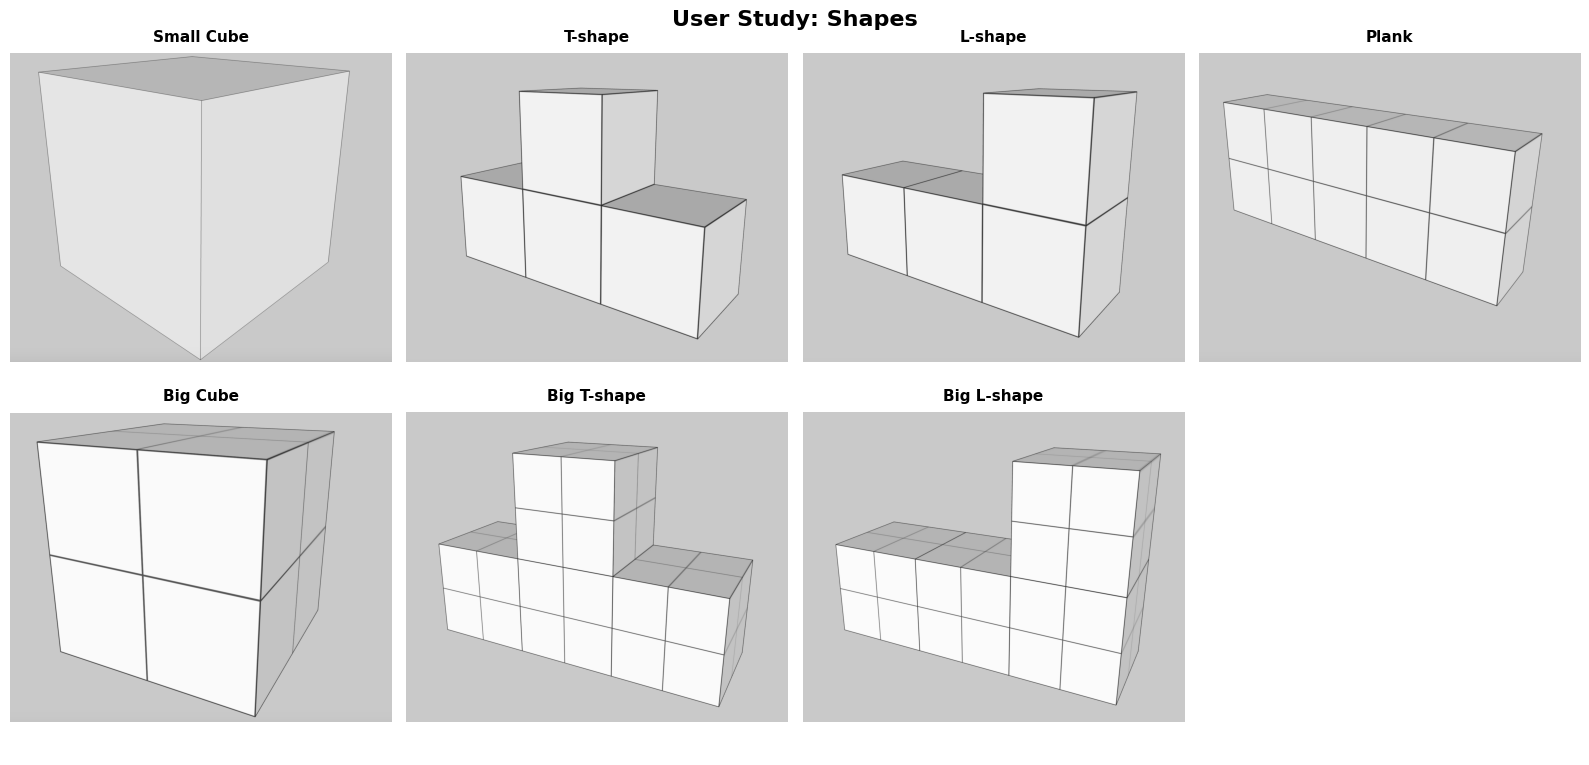

In [36]:
# Shape Screenshots Visualization (Compact Layout Only)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the shapes and their corresponding image files
shapes_data = [
    ("Small Cube", "cube.png"),
    ("T-shape", "t-shape.png"),
    ("L-shape", "l-shape.png"),
    ("Plank", "plank.png"),
    ("Big Cube", "big-cube.png"),
    ("Big T-shape", "big-t-shape.png"),
    ("Big L-shape", "big-l-shape.png")
]

# Path to the shapes directory
shapes_path = "../user-study-analysis/meta/shapes/"

# Create a more compact 2x4 layout
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('User Study: Shapes', fontsize=16, fontweight='bold', y=0.95)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Display each shape in compact layout
for i, (shape_name, filename) in enumerate(shapes_data):
    if i < len(axes_flat):
        ax = axes_flat[i]
        img_path = os.path.join(shapes_path, filename)
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(shape_name, fontsize=11, fontweight='bold', pad=8)
        else:
            ax.text(0.5, 0.5, f'Image not found:\n{filename}', 
                    ha='center', va='center', fontsize=9, color='red')
            ax.set_title(shape_name, fontsize=11, fontweight='bold', pad=8)
        ax.axis('off')

# Hide the last empty subplot (since we have 7 shapes and 8 subplots)
if len(shapes_data) < len(axes_flat):
    for i in range(len(shapes_data), len(axes_flat)):
        axes_flat[i].axis('off')

plt.tight_layout()
plt.show()